Do the same as we did in the example lab, but use the pandas library functions.

- example of the Radish survey dataset (finding high votes, and detecting fraudulent votes)

- example of Airports and Route dataset (flying distance statistics)

note: All assignments should be submitted in Notebook code format. (use as much documentation text as possible to explain your code.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

- library import 하기

## Radishsurvey 
##### There are  300 lines of survey data in the file radishsurvey.txt. Each line consists of a name, a hyphen, then a radish variety. I want to know:

- What’s the most popular radish variety?
- What are the least popular?
- Did anyone vote twice?
- https://www.google.com/search?q=radish+variety+pictures&tbm=isch&source=hp&sa=X&ved=2ahUKEwid29n62MDiAhWq3mEKHcPpDqMQ7Al6BAgJEA0&biw=1402&bih=895

In [2]:
!curl http://opentechschool.github.io/python-data-intro/files/radishsurvey.txt\
    -o radishsurvey.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 19816  100 19816    0     0  45242      0 --:--:-- --:--:-- --:--:-- 45345


In [3]:
# 파일의 내용 확인
!type radishsurvey.txt


Evie Pulsford - April Cross
Matilda Condon - April Cross
Samantha Mansell - Champion
geronima trevisani - cherry belle
Alexandra Shoebridge - Snow Belle
Sarah Ahuia Ova - Snow Belle
Emma Slattery - Bunny Tail
Fabiana  Milanesi - Champion
Makayla McMinn - Snow Belle
Julian O'Leary - Sicily Giant
Hannah Collie - Bunny Tail
Toby Lundie - Plum Purple
Baldo Palerma - Champion
Phoebe Barwell - Plum Purple
Sheng Shen - Champion
Jonathan Rolph - Snow Belle
Aaron Yarnold - Red King
Indiana angwin -  Daikon 
Luke Komine - White Icicle
Blake Ricardo - Daikon
Mikayla Biddell - Daikon
Piper Wheelwright - Bunny Tail
Bailey Derrington - White Icicle
Eufrosina Ferri - Daikon
Madeleine Abrahams - Daikon
Indiana Cowper - Sicily Giant
Procopio Zito - Red King
Ryan Langley - French Breakfast
anthony Gairdner - French Breakfast
Darcy Kayser - Champion
Adelmo De Luca - Plum Purple
Sienna Hovell - Champion
Mary Cardell - April Cross
Ebony Agnes - Daikon
Lola Atkinson - Plum Purple
Jonathan Walton - Champion


In [39]:
df = pd.read_csv("radishsurvey.txt", sep= ' - ', names = ["name", "vote"], engine = 'python')
df.head() # 위에서 부터 5개의 데이터 확인
# rad|ishsurvey파일을 dataFrame으로 불러오기 
# 해당 파일을 ' - '로 구분해서 불러오고
# names = ["name", "vote"]를 통해 컬럼명을 설정해줌.


,name,vote
0,Evie Pulsford,April Cross
1,Matilda Condon,April Cross
2,Samantha Mansell,Champion
3,geronima trevisani,cherry belle
4,Alexandra Shoebridge,Snow Belle


In [5]:
# 특정조건 (예: 특정 야채에 투표한 경우만 처리하는 프로그램)
for name in df[df.vote == "White Icicle"].name.values:
    print(name + " likes White Icicle!")
# White Icicle을 투표한 사람들만 뽑아서 이름 값만 가져와 아래와 같이 출력.


Luke Komine likes White Icicle!
Bailey Derrington likes White Icicle!
Tyler Forbes likes White Icicle!
Gianfranco Cremonesi likes White Icicle!
Tao Hsiao likes White Icicle!
Emily Walters likes White Icicle!
Thomas Oom likes White Icicle!
Stephanie Schnaars likes White Icicle!
Anna Denning likes White Icicle!
Ruby Fox likes White Icicle!
Ali Dedman likes White Icicle!
Sarah Milford likes White Icicle!
Hudson Dodgshun likes White Icicle!
Lara Salting likes White Icicle!
Amelie Farber likes White Icicle!
Isabella Pardey likes White Icicle!
Zhi Chin likes White Icicle!
Caitlyn Mullah likes White Icicle!
Taj Shackell likes White Icicle!
Xin Qian Shih likes White Icicle!
Abigail Clark likes White Icicle!
Bianca Knopwood likes White Icicle!
Mia Legg likes White Icicle!
Lilian Macquarie likes White Icicle!
Zachary Bass likes White Icicle!
Hayley Coverdale likes White Icicle!
David Moynihan likes White Icicle!
Angus De Mestre likes White Icicle!
Emily Plante likes White Icicle!
Kiara Maxwell-M

In [6]:
print("Counting votes for White Icicle...")
sum(df.vote == "White Icicle") #White Icicle을 투표한 사람들의 수

Counting votes for White Icicle...


59

 - 투표 결과 확인

In [7]:
df["vote"].value_counts() #value_counts()를 통해 야채별 표 수 확인 
# -> 데이터 정제 필요 (맨앞 공백, 소문자 대문자 구분, 중간 공백 스페이스 하나로)

Champion            75
Bunny Tail          68
April Cross         67
French Breakfast    65
White Icicle        59
Snow Belle          58
Daikon              58
Cherry Belle        53
Plum Purple         53
Red King            52
Sicily Giant        52
french breakfast     7
white icicle         5
april cross          4
bunny tail           4
daikon               4
red king             3
snow belle           3
sicily giant         3
 Cherry Belle        2
cherry belle         2
 Snow Belle          2
 Daikon              1
Sicily  Giant        1
 Red King            1
 Sicily Giant        1
April cross          1
 plum purple         1
Plum  Purple         1
plum purple          1
champion             1
 Plum Purple         1
Cherry  Belle        1
 White Icicle        1
Name: vote, dtype: int64

- 데이터 정제

In [8]:
df["vote"] = df['vote'].str.strip() #vote의 양옆 공백 제거
df["vote"] = df['vote'].str.capitalize() #first character 만 대문자로
df["vote"] = df['vote'].str.replace("  ", " ") # space 두 개를 space 한 개로 교체
df["vote"].value_counts() # 데이터 정제 확인

Champion            76
Bunny tail          72
April cross         72
French breakfast    72
White icicle        65
Daikon              63
Snow belle          63
Cherry belle        58
Sicily giant        57
Plum purple         57
Red king            56
Name: vote, dtype: int64

- 두 번 투표한 사람 찾기 and 최종 결과

In [9]:
df[df.duplicated(["name"])]  #name에서 중복 되는 값(두 번 투표)을 가진 데이터 확인

,name,vote
671,Phoebe Barwell,Plum purple
687,Procopio Zito,White icicle


In [10]:
for name, vote in df[df.duplicated(["name"])].values:
    print(name, "has already voted for ", vote, "Fraud !!!")

Phoebe Barwell has already voted for  Plum purple Fraud !!!
Procopio Zito has already voted for  White icicle Fraud !!!


In [11]:
df.drop_duplicates(["name"], inplace = True) 
df["vote"].value_counts()
#중복값 처리(unique한 1개의 key만 남기고 나머지 중복은 제거) 

Champion            76
Bunny tail          72
April cross         72
French breakfast    72
White icicle        64
Daikon              63
Snow belle          63
Cherry belle        58
Sicily giant        57
Plum purple         56
Red king            56
Name: vote, dtype: int64

In [12]:
df.vote.value_counts().idxmax()

'Champion'

In [13]:
print ("...Final result...")
print ("Max vote is ", df.vote.mode()[0], ": ", max(df.value_counts("vote")), "times...")
# mode는 최빈 값을 나타낸다. 

...Final result...
Max vote is  Champion :  76 times...


In [14]:
p = df.vote.value_counts()
p

Champion            76
Bunny tail          72
April cross         72
French breakfast    72
White icicle        64
Daikon              63
Snow belle          63
Cherry belle        58
Sicily giant        57
Plum purple         56
Red king            56
Name: vote, dtype: int64

In [15]:
p.keys()

Index(['Champion', 'Bunny tail', 'April cross', 'French breakfast',
       'White icicle', 'Daikon', 'Snow belle', 'Cherry belle', 'Sicily giant',
       'Plum purple', 'Red king'],
      dtype='object')

In [16]:
p.values

array([76, 72, 72, 72, 64, 63, 63, 58, 57, 56, 56], dtype=int64)

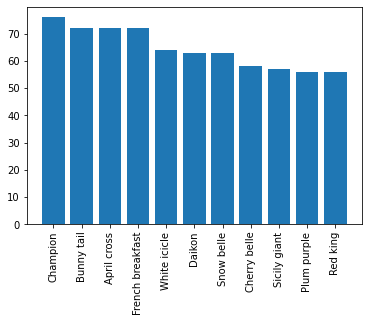

In [17]:
plt.bar(p.keys(), p.values)
plt.xticks(rotation=90)
plt.show()

## 항공운항 데이터
- https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat
- https://openflights.org/data.html

In [18]:
!curl https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat \
    -o airports.dat

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  2 1100k    2 31913    0     0  10630      0  0:01:46  0:00:03  0:01:43 10634
  2 1100k    2 31913    0     0   7962      0  0:02:21  0:00:04  0:02:17  7962
  2 1100k    2 31913    0     0   6354      0  0:02:57  0:00:05  0:02:52  6355
  2 1100k    2 31913    0     0   5594      0  0:03:21  0:00:05  0:03:16  6542
 14 1100k   14  159k    0     0  23891      0  0:00:47  0:00:06  0:00:41 30082
 26 1100k   26  287k    0     0  37473      0  0:00:30  0:00:07  0:00:23 54106
 26 1100k   26  287k    0     0  33204      0  0:00:33  0:00:08  0:00:25 54072
 26 1100k   26  287k    0     0  29802      0  0:00

In [21]:
!type airports.dat

1,"Goroka Airport","Goroka","Papua New Guinea","GKA","AYGA",-6.081689834590001,145.391998291,5282,10,"U","Pacific/Port_Moresby","airport","OurAirports"
2,"Madang Airport","Madang","Papua New Guinea","MAG","AYMD",-5.20707988739,145.789001465,20,10,"U","Pacific/Port_Moresby","airport","OurAirports"
3,"Mount Hagen Kagamuga Airport","Mount Hagen","Papua New Guinea","HGU","AYMH",-5.826789855957031,144.29600524902344,5388,10,"U","Pacific/Port_Moresby","airport","OurAirports"
4,"Nadzab Airport","Nadzab","Papua New Guinea","LAE","AYNZ",-6.569803,146.725977,239,10,"U","Pacific/Port_Moresby","airport","OurAirports"
5,"Port Moresby Jacksons International Airport","Port Moresby","Papua New Guinea","POM","AYPY",-9.443380355834961,147.22000122070312,146,10,"U","Pacific/Port_Moresby","airport","OurAirports"
6,"Wewak International Airport","Wewak","Papua New Guinea","WWK","AYWK",-3.58383011818,143.669006348,19,10,"U","Pacific/Port_Moresby","airport","OurAirports"
7,"Narsarsuaq Airport","Narssarssuaq",

132,"Rankin Inlet Airport","Rankin Inlet","Canada","YRT","CYRT",62.8114013672,-92.1157989502,94,-6,"A","America/Winnipeg","airport","OurAirports"
133,"Sudbury Airport","Sudbury","Canada","YSB","CYSB",46.625,-80.79889678955078,1141,-5,"A","America/Toronto","airport","OurAirports"
134,"Sherbrooke Airport","Sherbrooke","Canada","YSC","CYSC",45.4385986328125,-71.69139862060547,792,-5,"A","America/Toronto","airport","OurAirports"
135,"Saint John Airport","St. John","Canada","YSJ","CYSJ",45.31610107421875,-65.89029693603516,357,-4,"A","America/Halifax","airport","OurAirports"
136,"Fort Smith Airport","Fort Smith","Canada","YSM","CYSM",60.020301818847656,-111.96199798583984,671,-7,"A","America/Edmonton","airport","OurAirports"
137,"Nanisivik Airport","Nanisivik","Canada","YSR","CYSR",72.982201,-84.613602,2106,-5,"A","America/Toronto","airport","OurAirports"
138,"Summerside Airport","Summerside","Canada","YSU","CYSU",46.44060134887695,-63.83359909057617,56,-4,"A","America/Halifax","airport","O

1022,"Muanda Airport","Muanda","Congo (Kinshasa)","MNB","FZAG",-5.9308600425720215,12.351799964904785,89,1,"N","Africa/Kinshasa","airport","OurAirports"
1023,"Kitona Base Airport","Kitona Base","Congo (Kinshasa)",\N,"FZAI",-5.918059825897217,12.447699546813965,394,1,"N","Africa/Kinshasa","airport","OurAirports"
1024,"Bandundu Airport","Bandoundu","Congo (Kinshasa)","FDU","FZBO",-3.3113200664520264,17.38170051574707,1063,1,"N","Africa/Kinshasa","airport","OurAirports"
1025,"Kikwit Airport","Kikwit","Congo (Kinshasa)","KKW","FZCA",-5.035769939422607,18.785600662231445,1572,1,"N","Africa/Kinshasa","airport","OurAirports"
1026,"Mbandaka Airport","Mbandaka","Congo (Kinshasa)","MDK","FZEA",0.0226000007242,18.2887001038,1040,1,"N","Africa/Kinshasa","airport","OurAirports"
1027,"Gbadolite Airport","Gbadolite","Congo (Kinshasa)","BDT","FZFD",4.253210067749023,20.975299835205078,1509,1,"N","Africa/Kinshasa","airport","OurAirports"
1028,"Gemena Airport","Gemena","Congo (Kinshasa)","GMA","FZFK",3.

1779,"Norman Manley International Airport","Kingston","Jamaica","KIN","MKJP",17.935699462890625,-76.7874984741211,10,-5,"U","America/Jamaica","airport","OurAirports"
1780,"Sangster International Airport","Montego Bay","Jamaica","MBJ","MKJS",18.503700256347656,-77.91339874267578,4,-5,"U","America/Jamaica","airport","OurAirports"
1781,"Ken Jones Airport","Port Antonio","Jamaica","POT","MKKJ",18.1987991333,-76.53450012210001,20,-5,"U","America/Jamaica","airport","OurAirports"
1782,"Tinson Pen Airport","Kingston","Jamaica","KTP","MKTP",17.98859977722168,-76.82379913330078,16,-5,"U","America/Jamaica","airport","OurAirports"
1783,"General Juan N Alvarez International Airport","Acapulco","Mexico","ACA","MMAA",16.757099151611328,-99.75399780273438,16,-6,"S","America/Mexico_City","airport","OurAirports"
1784,"Del Norte International Airport","Monterrey","Mexico","NTR","MMAN",25.865601,-100.237,1476,-6,"S","America/Mexico_City","airport","OurAirports"
1785,"Jes첬s Ter찼n Paredo International Airpo

2344,"Hanamaki Airport","Hanamaki","Japan","HNA","RJSI",39.4286003112793,141.13499450683594,297,9,"U","Asia/Tokyo","airport","OurAirports"
2345,"Akita Airport","Akita","Japan","AXT","RJSK",39.6156005859375,140.218994140625,313,9,"U","Asia/Tokyo","airport","OurAirports"
2346,"Misawa Air Base","Misawa","Japan","MSJ","RJSM",40.703201293899994,141.367996216,119,9,"U","Asia/Tokyo","airport","OurAirports"
2347,"Sendai Airport","Sendai","Japan","SDJ","RJSS",38.1397018433,140.917007446,15,9,"U","Asia/Tokyo","airport","OurAirports"
2348,"Matsushima Air Base","Matsushima","Japan",\N,"RJST",38.4048995972,141.220001221,7,9,"U","Asia/Tokyo","airport","OurAirports"
2350,"Atsugi Naval Air Facility","Atsugi","Japan","NJA","RJTA",35.4546012878418,139.4499969482422,205,9,"U","Asia/Tokyo","airport","OurAirports"
2351,"Tateyama Airport","Tateyama","Japan",\N,"RJTE",34.987099,139.828995,10,9,"U","Asia/Tokyo","airport","OurAirports"
2352,"Hachijojima Airport","Hachijojima","Japan","HAC","RJTH",33.1150016785

2868,"Arturo Michelena International Airport","Valencia","Venezuela","VLN","SVVA",10.14973258972168,-67.92839813232422,1411,-4,"U","America/Caracas","airport","OurAirports"
2870,"Dr. Antonio Nicol찼s Brice챰o Airport","Valera","Venezuela","VLV","SVVL",9.34047794342041,-70.58406066894531,2060,-4,"U","America/Caracas","airport","OurAirports"
2871,"Valle de La Pascua Airport","Valle De La Pascua","Venezuela","VDP","SVVP",9.22202777863,-65.9935836792,410,-4,"U","America/Caracas","airport","OurAirports"
2872,"Linden Airport","Linden","Guyana",\N,"SYLD",5.96592,-58.270302,180,-4,"U","America/Guyana","airport","OurAirports"
2873,"Lethem Airport","Lethem","Guyana","LTM","SYLT",3.37276,-59.789398,351,-4,"U","America/Guyana","airport","OurAirports"
2874,"V.C. Bird International Airport","Antigua","Antigua and Barbuda","ANU","TAPA",17.1367,-61.792702,62,-4,"U","America/Antigua","airport","OurAirports"
2875,"Sir Grantley Adams International Airport","Bridgetown","Barbados","BGI","TBPB",13.0746002197

3603,"Terre Haute Regional Airport, Hulman Field","Terre Haute","United States","HUF","KHUF",39.4515,-87.307602,589,-5,"A","America/New_York","airport","OurAirports"
3604,"Havre City County Airport","Havre","United States","HVR","KHVR",48.54299927,-109.762001,2591,-7,"A","America/Denver","airport","OurAirports"
3605,"Grant County International Airport","Grant County Airport","United States","MWH","KMWH",47.20769882,-119.3199997,1189,-8,"A","America/Los_Angeles","airport","OurAirports"
3606,"Edward F Knapp State Airport","Montpelier","United States","MPV","KMPV",44.20349884,-72.56230164,1166,-5,"A","America/New_York","airport","OurAirports"
3607,"San Nicolas Island Nolf Airport","San Nicolas Island","United States",\N,"KNSI",33.23979949951172,-119.45800018310547,506,-8,"A","America/Los_Angeles","airport","OurAirports"
3608,"Richmond International Airport","Richmond","United States","RIC","KRIC",37.50519943237305,-77.3197021484375,167,-5,"A","America/New_York","airport","OurAirports"
360

5430,"Momote Airport","Momote","Papua New Guinea","MAS","AYMO",-2.06189,147.423996,12,10,"U","Pacific/Port_Moresby","airport","OurAirports"
5431,"Moro Airport","Moro","Papua New Guinea","MXH","AYMR",-6.36332988739,143.238006592,2740,10,"U","Pacific/Port_Moresby","airport","OurAirports"
5432,"Misima Island Airport","Misima Island","Papua New Guinea","MIS","AYMS",-10.689200401299999,152.837997437,26,10,"U","Pacific/Port_Moresby","airport","OurAirports"
5433,"Tari Airport","Tari","Papua New Guinea","TIZ","AYTA",-5.84499979019,142.947998047,5500,10,"U","Pacific/Port_Moresby","airport","OurAirports"
5434,"Tabubil Airport","Tabubil","Papua New Guinea","TBG","AYTB",-5.27861,141.225998,1570,10,"U","Pacific/Port_Moresby","airport","OurAirports"
5435,"Tokua Airport","Tokua","Papua New Guinea","RAB","AYTK",-4.34045982361,152.380004883,32,10,"U","Pacific/Port_Moresby","airport","OurAirports"
5436,"Vanimo Airport","Vanimo","Papua New Guinea","VAI","AYVN",-2.6926,141.3028,10,10,"U","Pacific/Port_Mor

5940,"Chitral Airport","Chitral","Pakistan","CJL","OPCH",35.886600494384766,71.80059814453125,4920,5,"N","Asia/Karachi","airport","OurAirports"
5941,"Dalbandin Airport","Dalbandin","Pakistan","DBA","OPDB",28.878299713100002,64.3998031616,2800,5,"N","Asia/Karachi","airport","OurAirports"
5942,"Dera Ghazi Khan Airport","Dera Ghazi Khan","Pakistan","DEA","OPDG",29.961000442504883,70.48590087890625,492,5,"N","Asia/Karachi","airport","OurAirports"
5943,"Dera Ismael Khan Airport","Dera Ismael Khan","Pakistan","DSK","OPDI",31.909400939941406,70.89659881591797,594,5,"N","Asia/Karachi","airport","OurAirports"
5944,"Jiwani Airport","Jiwani","Pakistan","JIW","OPJI",25.067800521900004,61.8054008484,186,5,"N","Asia/Karachi","airport","OurAirports"
5945,"Hyderabad Airport","Hyderabad","Pakistan","HDD","OPKD",25.3181,68.366096,130,5,"N","Asia/Karachi","airport","OurAirports"
5946,"Khuzdar Airport","Khuzdar","Pakistan","KDD","OPKH",27.790599823,66.6473007202,4012,5,"N","Asia/Karachi","airport","OurAir

7307,"Jos챕 Aponte de la Torre Airport","Ceiba","Puerto Rico","NRR","TJRV",18.245300293,-65.6434020996,38,-4,"A","America/Puerto_Rico","airport","OurAirports"
7309,"Charlotte Amalie Harbor Seaplane Base","Charlotte Amalie","Virgin Islands","SPB","VI22",18.338600158691406,-64.9406967163086,0,-4,"A","America/St_Thomas","airport","OurAirports"
7311,"D. Casimiro Szlapelis Airport","Alto Rio Senguer","Argentina","ARR","SAVR",-45.013599,-70.812202,2286,-3,"N","America/Catamarca","airport","OurAirports"
7312,"Jose De San Martin Airport","Jose de San Martin","Argentina","JSM","SAWS",-44.048599243199995,-70.4589004517,2407,-3,"N","America/Catamarca","airport","OurAirports"
7313,"Uyuni Airport","Uyuni","Bolivia","UYU","SLUY",-20.446300506599997,-66.8483963013,11136,-4,"U","America/La_Paz","airport","OurAirports"
7317,"Rurenabaque Airport","Rerrenabaque","Bolivia","RBQ","SLRQ",-14.427900314299999,-67.4968032837,676,-4,"U","America/La_Paz","airport","OurAirports"
7320,"Abaiang Airport","Abaiang Ato

8519,"Moore County Airport","Pinehurst-Southern Pines","United States","SOP","KSOP",35.23740005,-79.3911972,455,-5,"A","America/New_York","airport","OurAirports"
8520,"Richmond County Airport","Rockingham","United States",\N,"KRCZ",34.8913,-79.759598,358,-5,"A","America/New_York","airport","OurAirports"
8524,"Baraboo Wisconsin Dells Airport","Baraboo","United States",\N,"KDLL",43.52270126,-89.77020264,979,-6,"A","America/Chicago","airport","OurAirports"
8526,"Statesville Regional Airport","Statesville","United States","SVH","KSVH",35.765300750732,-80.953903198242,968,-5,"A","America/New_York","airport","OurAirports"
8528,"Burlington Municipal Airport","Burlington","United States",\N,"KBUU",42.69070053100586,-88.30460357666016,779,-6,"A","America/Chicago","airport","OurAirports"
8532,"William T. Piper Memorial Airport","Lock Haven","United States","LHV","KLHV",41.13560104,-77.42230225,556,-5,"A","America/New_York","airport","OurAirports"
8538,"Zelienople Municipal Airport","Zelienople",

11438,"Camarillo Airport","Camarillo - CA","United States",\N,"KCMA",34.21369934082031,-119.09400177001953,77,-8,"A",\N,"airport","OurAirports"
11452,"Leopoldsburg Airfield","Leopoldsburg","Belgium",\N,"EBLE",51.12,5.3072222,207,1,"E",\N,"airport","OurAirports"
11473,"Jinchuan Airport","Jinchuan","China","JIC","ZLJC",38.542222222199996,102.348333333,4740,8,"U",\N,"airport","OurAirports"
11479,"Omtepe Airport","Moyogalpa","Nicaragua",\N,"MNLP",11.523616,-85.702995,200,-6,"S",\N,"airport","OurAirports"
11498,"Alashankou Bole (Bortala) airport","Bole","China","BPL","ZWAX",44.895,82.3,1253,8,"N",\N,"airport","OurAirports"
11499,"Fuyun Koktokay Airport","Fuyun","China","FYN","ZWFY",46.804169,89.512006,3081,8,"N",\N,"airport","OurAirports"
11524,"Achinsk Airport","Achinsk","Russia","ACS","UNKS",56.2682991027832,90.57080078125,1033,8,"N",\N,"airport","OurAirports"
11545,"Linfen Qiaoli Airport","LINFEN","China","LFQ","ZBLF",36.132629,111.641236,1483,8,"U",\N,"airport","OurAirports"
11583,"Hint

12931,"El Fuentero Airport","Svenborg","Denmark",\N,"SVFT",7.099999904632568,-69.58333587646484,420,1,"E",\N,"airport","OurAirports"
12941,"Sturgate Airfield","Eger","Hungary",\N,"EGCS",53.381099700927734,-0.6852779984474182,58,1,"E",\N,"airport","OurAirports"
12945,"Simberi Airport","Simberi Island","Papua New Guinea","NIS","AYSE",-2.66222222222,151.997777778,10,10,"N",\N,"airport","OurAirports"
12946,"Bulolo Airport","Bulolo","Papua New Guinea","BUL","AYBU",-7.216286671410001,146.649541855,2240,10,"N",\N,"airport","OurAirports"
12948,"Kintore Airport","Kintore","Australia",\N,"YKNT",-23.264999389648438,129.38699340820312,0,9.5,"N",\N,"airport","OurAirports"
12950,"Statesboro Bulloch County Airport","Statesboro","United States","TBR","KTBR",32.4827003479,-81.73690032959999,187,-5,"A",\N,"airport","OurAirports"
12951,"Utopia Airport","Utopia","Australia",\N,"YUTP",-22.05500030517578,134.7899932861328,0,9.5,"N",\N,"airport","OurAirports"
12957,"Nyrripi Airport","Nyirripi","Australia",\N

In [22]:
airport_df = pd.read_csv("airports.dat", header = None, index_col="ID",
                         names = ['ID', 'Name', 'City','Country',
                                 'IATA', 'ICAO', 'Latitude', 'Longitude',
                                 'Altitude', 'Timezone', 'DST', 'Tz database',
                                 'Type', 'Source'])
airport_df.head() # 위에서 부터 5개의 데이터 확인
# airports파일을 dataFrame으로 불러오기 
# names = []를 통해 컬럼명을 설정해줌.
# index_col = "ID"로 인덱스칼럼 설정


,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database,Type,Source
ID,,,,,,,,,,,,,
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [23]:
korea_airport_df =airport_df[airport_df["Country"] == 'South Korea'] 
korea_airport_df.head()
#나라가 남한인 데이터들만 뽑아서 확인

,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database,Type,Source
ID,,,,,,,,,,,,,
2361,Gwangju Airport,Kwangju,South Korea,KWJ,RKJJ,35.123173,126.805444,39,9,U,Asia/Seoul,airport,OurAirports
2364,Jeon Ju Airport (G-703),Jhunju,South Korea,CHN,RKJU,35.878080,127.119112,96,9,U,Asia/Seoul,airport,OurAirports
2365,Yeosu Airport,Yeosu,South Korea,RSU,RKJY,34.842300,127.616997,53,9,U,Asia/Seoul,airport,OurAirports
2366,Sokcho Airport,Sokch'o,South Korea,\N,RKND,38.142601,128.598999,92,9,U,Asia/Seoul,airport,OurAirports
2367,Gangneung Airport (K-18),Kangnung,South Korea,KAG,RKNN,37.753601,128.943915,35,9,U,Asia/Seoul,airport,OurAirports


In [24]:
for a in korea_airport_df.Name:
    print(a, 'in', korea_airport_df.Country.values[0])
# south korea에 있는 공항들 확인

Gwangju Airport in South Korea
Jeon Ju Airport (G-703) in South Korea
Yeosu Airport in South Korea
Sokcho Airport in South Korea
Gangneung Airport (K-18) in South Korea
Jeju International Airport in South Korea
Jinhae Airbase/Airport (G-813/K-10) in South Korea
Gimhae International Airport in South Korea
Ulsan Airport in South Korea
A 511 Airport in South Korea
Seoul Air Base (K-16) in South Korea
Osan Air Base in South Korea
Gimpo International Airport in South Korea
Suwon Airport in South Korea
Pohang Airport (G-815/K-3) in South Korea
Daegu Airport in South Korea
Yecheon Airbase in South Korea
Incheon International Airport in South Korea
Muan International Airport in South Korea
Kunsan Air Base in South Korea
Mokpo Heliport in South Korea
Wonju/Hoengseong Air Base (K-38/K-46) in South Korea
Yangyang International Airport in South Korea
Sacheon Air Base/Airport in South Korea
Cheongju International Airport/Cheongju Air Base (K-59/G-513) in South Korea
Jeongseok Airport in South Korea

## 경로 데이터
https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat

In [25]:
!curl https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat \
    -o routes.dat

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0 2321k    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0 2321k    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0
  0 2321k    0     0    0     0      0      0 --:--:--  0:00:04 --:--:--     0
  1 2321k    1 32768    0     0   5923      0  0:06:41  0:00:05  0:06:36  6168
  2 2321k    2 49152    0     0   7492      0  0:05:17  0:00:06  0:05:11  9441
  4 2321k    4 98304    0     0  13287      0  0:02:58  0:00:07  0:02:51 21893
  6 2321k    6  144k    0     0  17477      0  0:02:16  0:00:08  0:02:08 32615
  8 2321k    8  208k    0     0  22969      0  0:01

In [26]:
!type routes.dat


 25 2321k   25  603k    0     0  48858      0  0:00:48  0:00:12  0:00:36 99096
 51 2321k   51 1206k    0     0  93421      0  0:00:25  0:00:13  0:00:12  222k
100 2321k  100 2321k    0     0   171k      0  0:00:13  0:00:13 --:--:--  498k


2B,410,AER,2965,KZN,2990,,0,CR2
2B,410,ASF,2966,KZN,2990,,0,CR2
2B,410,ASF,2966,MRV,2962,,0,CR2
2B,410,CEK,2968,KZN,2990,,0,CR2
2B,410,CEK,2968,OVB,4078,,0,CR2
2B,410,DME,4029,KZN,2990,,0,CR2
2B,410,DME,4029,NBC,6969,,0,CR2
2B,410,DME,4029,TGK,\N,,0,CR2
2B,410,DME,4029,UUA,6160,,0,CR2
2B,410,EGO,6156,KGD,2952,,0,CR2
2B,410,EGO,6156,KZN,2990,,0,CR2
2B,410,GYD,2922,NBC,6969,,0,CR2
2B,410,KGD,2952,EGO,6156,,0,CR2
2B,410,KZN,2990,AER,2965,,0,CR2
2B,410,KZN,2990,ASF,2966,,0,CR2
2B,410,KZN,2990,CEK,2968,,0,CR2
2B,410,KZN,2990,DME,4029,,0,CR2
2B,410,KZN,2990,EGO,6156,,0,CR2
2B,410,KZN,2990,LED,2948,,0,CR2
2B,410,KZN,2990,SVX,2975,,0,CR2
2B,410,LED,2948,KZN,2990,,0,CR2
2B,410,LED,2948,NBC,6969,,0,CR2
2B,410,LED,2948,UUA,6160,,0,CR2
2B,410,MRV,2962,ASF,2966,,0,CR2
2B,410,NBC,6969,DME,4029,,0,CR2
2B,410,NBC,6969,GYD,2922,,0,CR2
2B,410,NBC,6969,LED,2948,,0,CR2
2B,410,NBC,6969,SVX,2975,,0,CR2
2B,410,NJC,2972,SVX,2975,,0,CR2
2B,410,NJC,2972,UUA,6160,,0,CR2
2B,410,NUX,4364,SVX,2975,,0,CR2
2B,410,OVB

3U,4608,CKG,3393,YIH,6361,,0,319
3U,4608,CKG,3393,ZHA,6357,,0,319
3U,4608,CSX,3371,CKG,3393,,0,319 321
3U,4608,CSX,3371,CTU,3395,,0,320
3U,4608,CSX,3371,FOC,3385,,0,320
3U,4608,CSX,3371,KMG,3382,,0,320
3U,4608,CSX,3371,SHE,4144,,0,320
3U,4608,CSX,3371,WNZ,6392,,0,319
3U,4608,CSX,3371,XMN,3383,,0,321
3U,4608,CTU,3395,CAN,3370,,0,321 320 330
3U,4608,CTU,3395,CGO,3375,,0,321
3U,4608,CTU,3395,CKG,3393,,0,330
3U,4608,CTU,3395,CSX,3371,,0,320
3U,4608,CTU,3395,DCY,9310,,0,319
3U,4608,CTU,3395,DSN,6434,,0,319
3U,4608,CTU,3395,HAK,4120,,0,321
3U,4608,CTU,3395,HDG,8407,,0,319
3U,4608,CTU,3395,HET,6345,,0,320
3U,4608,CTU,3395,HFE,3389,,0,321
3U,4608,CTU,3395,HGH,3386,,0,320 319
3U,4608,CTU,3395,HKG,3077,,0,320
3U,4608,CTU,3395,HKT,3179,,0,321
3U,4608,CTU,3395,ICN,3930,,0,321
3U,4608,CTU,3395,INC,4085,,0,321
3U,4608,CTU,3395,JHG,3381,,0,319
3U,4608,CTU,3395,JIQ,8781,,0,320
3U,4608,CTU,3395,JZH,4301,,0,319
3U,4608,CTU,3395,KHN,3384,,0,321
3U,4608,CTU,3395,KMG,3382,,0,320
3U,4608,CTU,3395,KOW,6379,,

4U,2548,CGN,344,LPA,1054,,0,319
4U,2548,CGN,344,MAN,478,,0,319
4U,2548,CGN,344,MXP,1524,,0,319 CRJ
4U,2548,CGN,344,NAP,1561,,0,319 320
4U,2548,CGN,344,NCE,1354,,0,319 320
4U,2548,CGN,344,NDR,5673,,0,319
4U,2548,CGN,344,OLB,1520,,0,319
4U,2548,CGN,344,PMI,3998,,0,320 319
4U,2548,CGN,344,PMO,1512,,0,319 CRJ
4U,2548,CGN,344,PRG,1587,,0,319 320 CRJ
4U,2548,CGN,344,PSA,1562,,0,319
4U,2548,CGN,344,PUY,1203,,0,319 CRJ
4U,2548,CGN,344,RAK,1075,,0,319
4U,2548,CGN,344,RHO,1472,,0,320
4U,2548,CGN,344,RJK,1205,,0,319
4U,2548,CGN,344,RLG,772,,0,319
4U,2548,CGN,344,SAW,4317,,0,319 320
4U,2548,CGN,344,SJJ,1646,,0,319
4U,2548,CGN,344,SKG,1486,,0,319 320
4U,2548,CGN,344,SPU,1206,,0,319
4U,2548,CGN,344,STN,548,,0,319
4U,2548,CGN,344,SUF,1508,,0,319
4U,2548,CGN,344,SZG,1612,,0,319
4U,2548,CGN,344,TLV,1590,,0,319 320
4U,2548,CGN,344,TUN,287,,0,319
4U,2548,CGN,344,TXL,351,,0,319 320
4U,2548,CGN,344,VCE,1551,,0,320 319
4U,2548,CGN,344,VIE,1613,,0,319 320
4U,2548,CGN,344,VRN,1550,,0,319
4U,2548,CGN,344,WAW,6

5J,1683,CGY,2400,BCD,2423,,0,ATR
5J,1683,CGY,2400,CEB,4206,,0,320 ATR 319
5J,1683,CGY,2400,DVO,4090,,0,ATR
5J,1683,CGY,2400,ILO,2429,,0,319
5J,1683,CGY,2400,MNL,2397,,0,320 319
5J,1683,CRK,4140,CEB,4206,,0,319
5J,1683,CRK,4140,HKG,3077,,0,319
5J,1683,CRK,4140,MFM,3121,,0,319
5J,1683,CRK,4140,SIN,3316,,0,319
5J,1683,CYZ,6733,MNL,2397,,0,319
5J,1683,DGT,2425,CEB,4206,,0,ATR
5J,1683,DGT,2425,MNL,2397,,0,319
5J,1683,DPL,4201,CEB,4206,,0,ATR
5J,1683,DPL,4201,DVO,4090,,0,ATR
5J,1683,DPL,4201,MNL,2397,,0,320 319
5J,1683,DPS,3940,MNL,2397,,0,320
5J,1683,DVO,4090,BCD,2423,,0,320
5J,1683,DVO,4090,CEB,4206,,0,320 319
5J,1683,DVO,4090,CGY,2400,,0,ATR
5J,1683,DVO,4090,DPL,4201,,0,ATR
5J,1683,DVO,4090,ILO,2429,,0,320 319
5J,1683,DVO,4090,MNL,2397,,0,320 330
5J,1683,DVO,4090,PPS,2433,,0,319
5J,1683,DVO,4090,ZAM,2404,,0,319
5J,1683,DXB,2188,MNL,2397,,0,330
5J,1683,GES,2402,CEB,4206,,0,320
5J,1683,GES,2402,ILO,2429,,0,319
5J,1683,GES,2402,MNL,2397,,0,320
5J,1683,HAN,3199,MNL,2397,,0,319
5J,1683,HKG,307

7H,16726,ANC,3774,ENA,3628,,0,BE1 DH8
7H,16726,ANC,3774,FAI,3832,,0,DH8 BE1
7H,16726,ANC,3774,HOM,3664,,0,BE1 DH8
7H,16726,ANC,3774,KSM,6718,,0,DH8
7H,16726,ANC,3774,UNK,7088,,0,DH8
7H,16726,ANC,3774,VDZ,3865,,0,DH8 BE1
7H,16726,ANI,5967,ANC,3774,,0,BE1 DH8
7H,16726,ANI,5967,CHU,7091,Y,0,CNA
7H,16726,ANI,5967,HCR,5962,Y,0,CNC
7H,16726,ANI,5967,KLG,5964,Y,0,CNA CNC
7H,16726,ANI,5967,RSH,7098,Y,0,CNA
7H,16726,ANI,5967,SHX,7090,Y,0,CNC
7H,16726,ANV,6713,HCR,5962,Y,0,CNC
7H,16726,ANV,6713,KGX,7219,Y,0,CNC
7H,16726,ATK,6714,AIN,7220,Y,0,CNC
7H,16726,ATK,6714,BRW,3571,Y,0,CNC
7H,16726,ATT,4385,BET,3599,Y,0,CNA
7H,16726,AUK,7199,EMK,7087,Y,0,CNA
7H,16726,AUK,7199,SXP,7200,Y,0,CNA
7H,16726,BET,3599,ANC,3774,,0,DH8
7H,16726,BET,3599,CYF,6960,Y,0,CNA
7H,16726,BET,3599,EEK,7093,Y,0,CNA
7H,16726,BET,3599,HPB,6716,Y,0,CNA
7H,16726,BET,3599,KKH,7213,Y,0,CNA
7H,16726,BET,3599,KLG,5964,Y,0,CNA CNC
7H,16726,BET,3599,KUK,7094,Y,0,CNA
7H,16726,BET,3599,KWK,7096,Y,0,CNA
7H,16726,BET,3599,KWN,7206,Y,0,CNA


8T,68,YLE,5463,YZF,196,,0,DHT
8T,68,YRA,5526,YZF,196,,0,DHT
8T,68,YSG,5511,YZF,196,,0,DHT
8T,68,YZF,196,YFJ,7277,,0,DHT
8T,68,YZF,196,YFS,60,,0,DHT
8T,68,YZF,196,YLE,5463,,0,DHT
8T,68,YZF,196,YRA,5526,,0,DHT
8T,68,YZF,196,YSG,5511,,0,DHT
8U,32,AKF,1153,BEN,1154,,0,320
8U,32,AMM,2170,BEN,1154,,0,320
8U,32,AMM,2170,TIP,1157,,0,332 320
8U,32,BEN,1154,AKF,1153,,0,320
8U,32,BEN,1154,AMM,2170,,0,320
8U,32,BEN,1154,CAI,1128,,0,320
8U,32,BEN,1154,CMN,1074,,0,320
8U,32,BEN,1154,IST,1701,,0,320
8U,32,BEN,1154,JED,2072,,0,320
8U,32,BEN,1154,MRA,5804,,0,320
8U,32,BEN,1154,TIP,1157,,0,320 319 332
8U,32,BEN,1154,TUN,287,,0,319 320
8U,32,CAI,1128,BEN,1154,,0,320
8U,32,CAI,1128,TIP,1157,,0,320 332
8U,32,CMN,1074,BEN,1154,,0,320
8U,32,CMN,1074,TIP,1157,,0,320 319 332
8U,32,DXB,2188,TIP,1157,,0,332
8U,32,FCO,1555,TIP,1157,,0,320
8U,32,HBE,3410,TIP,1157,,0,320 319
8U,32,IST,1701,BEN,1154,,0,320
8U,32,IST,1701,MRA,5804,,0,320
8U,32,IST,1701,TIP,1157,,0,332 319
8U,32,JED,2072,BEN,1154,,0,320
8U,32,JED,2072

9U,1073,KIV,1735,VCE,1551,,0,E90
9U,1073,KIV,1735,VRN,1550,,0,E90
9U,1073,LCA,1197,KIV,1735,,0,E90
9U,1073,LED,2948,KIV,1735,,0,E90
9U,1073,LIS,1638,KIV,1735,,0,E90
9U,1073,MXP,1524,KIV,1735,,0,E90
9U,1073,OTP,1657,KIV,1735,,0,EM2
9U,1073,SGC,2974,KIV,1735,,0,E90
9U,1073,STN,548,KIV,1735,,0,E90 320
9U,1073,VCE,1551,KIV,1735,,0,E90
9U,1073,VRN,1550,KIV,1735,,0,E90
9V,20004,AUA,2895,CCS,2851,,0,732
9V,20004,AUA,2895,MAR,2848,,0,732
9V,20004,BLA,2821,CCS,2851,,0,734 732
9V,20004,BLA,2821,MIA,3576,,0,734
9V,20004,BLA,2821,PMV,2850,,0,732
9V,20004,BLA,2821,PTY,1871,,0,734
9V,20004,BLA,2821,PZO,2856,,0,732
9V,20004,BLA,2821,VLN,2868,,0,732
9V,20004,BNS,2822,CCS,2851,,0,732
9V,20004,CCS,2851,AUA,2895,,0,732
9V,20004,CCS,2851,BLA,2821,,0,734 732
9V,20004,CCS,2851,BNS,2822,,0,732
9V,20004,CCS,2851,CUR,2897,,0,732
9V,20004,CCS,2851,MAR,2848,,0,732
9V,20004,CCS,2851,MRD,2849,,0,F50
9V,20004,CCS,2851,PZO,2856,,0,F50
9V,20004,CCS,2851,VLV,2870,,0,F50
9V,20004,CUR,2897,CCS,2851,,0,732
9V,20004,MAR,2

A3,96,ATH,3941,JKL,4192,,0,DH8
A3,96,ATH,3941,JMK,1468,,0,320 DH4
A3,96,ATH,3941,JNX,4194,,0,DH8
A3,96,ATH,3941,JSI,1475,,0,DH4
A3,96,ATH,3941,JSY,5787,,0,DH8
A3,96,ATH,3941,JTR,1479,,0,321 320 DH4 319
A3,96,ATH,3941,JTY,4190,,0,DH8
A3,96,ATH,3941,KGS,1458,,0,320 DH4
A3,96,ATH,3941,KIT,1454,,0,DH4
A3,96,ATH,3941,KVA,1462,,0,DH4
A3,96,ATH,3941,LCA,1197,,0,320
A3,96,ATH,3941,LED,2948,,0,320
A3,96,ATH,3941,LHR,507,,0,321 320
A3,96,ATH,3941,LRS,1464,,0,DH8
A3,96,ATH,3941,LXS,1465,,0,DH4
A3,96,ATH,3941,LYS,1335,,0,320
A3,96,ATH,3941,MAD,1229,,0,320
A3,96,ATH,3941,MAN,478,,0,320
A3,96,ATH,3941,MJT,1469,,0,320 DH4
A3,96,ATH,3941,MLO,4193,,0,DH8
A3,96,ATH,3941,MRS,1353,,0,320
A3,96,ATH,3941,MUC,346,,0,320
A3,96,ATH,3941,MXP,1524,,0,320
A3,96,ATH,3941,NTE,1418,,0,320
A3,96,ATH,3941,OSL,644,Y,0,73W 73G
A3,96,ATH,3941,OTP,1657,,0,320 DH4
A3,96,ATH,3941,PAS,4195,,0,DH8
A3,96,ATH,3941,PHL,3752,Y,0,332
A3,96,ATH,3941,PRG,1587,,0,320
A3,96,ATH,3941,RHO,1472,,0,320 DH4
A3,96,ATH,3941,SKG,1486,,0,320 3

AA,24,AMA,3840,DFW,3670,Y,0,ER4 CRJ ERD
AA,24,AMM,2170,JFK,3797,Y,0,340 330
AA,24,AMM,2170,ORD,3830,Y,0,340
AA,24,AMM,2170,YUL,146,Y,0,330
AA,24,AMS,580,LHR,507,Y,0,320 767 321 319
AA,24,AMS,580,PHL,3752,,0,757
AA,24,ANC,3774,LAX,3484,Y,0,737
AA,24,ANC,3774,PHX,3462,,0,319 320
AA,24,ANU,2874,CLT,3876,,0,319
AA,24,ANU,2874,JFK,3797,,0,738
AA,24,ANU,2874,MIA,3576,,0,738
AA,24,AQP,2802,LIM,2789,Y,0,319
AA,24,ARN,737,LHR,507,Y,0,320 321 319
AA,24,ART,3838,ORD,3830,Y,0,ERD
AA,24,ART,3838,PHL,3752,Y,0,CRJ
AA,24,ASP,3319,SYD,3361,Y,0,737
AA,24,ASU,2699,MIA,3576,,0,757
AA,24,ATH,3941,LHR,507,Y,0,320 767
AA,24,ATH,3941,PHL,3752,,0,332
AA,24,ATL,3682,CLT,3876,Y,0,319 320 CR9 321
AA,24,ATL,3682,DFW,3670,,0,M80 319 M83
AA,24,ATL,3682,LHR,507,Y,0,777
AA,24,ATL,3682,MIA,3576,,0,738
AA,24,ATL,3682,ORD,3830,Y,0,CR7 E75
AA,24,ATL,3682,PHL,3752,Y,0,E75 E90 319 CRJ E70
AA,24,ATL,3682,PHX,3462,Y,0,320 321
AA,24,AUA,2895,CLT,3876,,0,757 319 320
AA,24,AUA,2895,MIA,3576,,0,738
AA,24,AUA,2895,PHL,3752,,0,320


AA,24,DCA,3520,LAX,3484,,0,738
AA,24,DCA,3520,LGA,3697,,0,319 E90
AA,24,DCA,3520,LIT,3660,Y,0,E70
AA,24,DCA,3520,MCI,3458,Y,0,E70 E75
AA,24,DCA,3520,MCO,3878,,0,320 319
AA,24,DCA,3520,MEM,3473,Y,0,CRJ
AA,24,DCA,3520,MHT,4011,Y,0,CRJ E75 E70
AA,24,DCA,3520,MIA,3576,,0,738
AA,24,DCA,3520,MSP,3858,Y,0,E70 E75
AA,24,DCA,3520,MSY,3861,Y,0,E70 E75
AA,24,DCA,3520,MYR,3515,Y,0,CRJ
AA,24,DCA,3520,NAS,1953,,0,319
AA,24,DCA,3520,OAJ,4386,Y,0,CRJ
AA,24,DCA,3520,OMA,3454,Y,0,E70
AA,24,DCA,3520,ORD,3830,,0,738 M83 M80
AA,24,DCA,3520,ORF,3611,,0,DH3
AA,24,DCA,3520,PBI,3722,Y,0,E75 E70
AA,24,DCA,3520,PDX,3720,Y,0,737
AA,24,DCA,3520,PHL,3752,,0,319 320 DH3
AA,24,DCA,3520,PHX,3462,,0,320 757
AA,24,DCA,3520,PIT,3570,Y,0,CRJ E75
AA,24,DCA,3520,PNS,3564,Y,0,CRJ
AA,24,DCA,3520,PVD,3641,Y,0,CRJ E75 E70
AA,24,DCA,3520,PWM,3862,Y,0,E75 CRJ E70
AA,24,DCA,3520,RDU,3626,Y,0,ERD CRJ
AA,24,DCA,3520,ROC,3622,Y,0,E70 CRJ
AA,24,DCA,3520,RSW,3793,Y,0,E75 E70
AA,24,DCA,3520,SAN,3731,,0,319
AA,24,DCA,3520,SAV,3613,Y,0,CR

AA,24,LAX,3484,ELP,3559,Y,0,CRJ
AA,24,LAX,3484,EUG,4099,Y,0,CRJ
AA,24,LAX,3484,FAT,3687,Y,0,CRJ
AA,24,LAX,3484,GDL,1804,Y,0,737
AA,24,LAX,3484,GRU,2564,,0,777
AA,24,LAX,3484,HKG,3077,Y,0,773
AA,24,LAX,3484,HNL,3728,,0,757
AA,24,LAX,3484,IAD,3714,,0,738
AA,24,LAX,3484,IAH,3550,Y,0,CR7
AA,24,LAX,3484,IND,3585,,0,738
AA,24,LAX,3484,JFK,3797,,0,32B 762
AA,24,LAX,3484,KOA,3514,,0,757
AA,24,LAX,3484,LAS,3877,,0,738
AA,24,LAX,3484,LHR,507,,0,77W
AA,24,LAX,3484,LIH,3602,,0,757
AA,24,LAX,3484,LIM,2789,Y,0,763
AA,24,LAX,3484,MAD,1229,Y,0,340
AA,24,LAX,3484,MCO,3878,,0,757 738
AA,24,LAX,3484,MEL,3339,Y,0,380
AA,24,LAX,3484,MEX,1824,Y,0,737
AA,24,LAX,3484,MFR,4101,Y,0,DH4
AA,24,LAX,3484,MIA,3576,,0,757 777 763 738
AA,24,LAX,3484,MMH,7081,Y,0,DH4
AA,24,LAX,3484,MRY,3948,Y,0,CRJ
AA,24,LAX,3484,NAN,1960,Y,0,330
AA,24,LAX,3484,NRT,2279,,0,777 773
AA,24,LAX,3484,OGG,3456,,0,757
AA,24,LAX,3484,OKC,3863,Y,0,CR7
AA,24,LAX,3484,ORD,3830,,0,738
AA,24,LAX,3484,PBI,3722,,0,738
AA,24,LAX,3484,PDX,3720,Y,0,737


AA,24,PHL,3752,BHM,3811,Y,0,CRJ
AA,24,PHL,3752,BNA,3690,Y,0,CRJ E75 E70
AA,24,PHL,3752,BOS,3448,,0,E90 319 321 320
AA,24,PHL,3752,BRU,302,,0,767
AA,24,PHL,3752,BTV,3711,,0,E90
AA,24,PHL,3752,BUF,3820,,0,DH3
AA,24,PHL,3752,BWI,3849,,0,DH3 319 E90
AA,24,PHL,3752,CAE,3561,Y,0,CRJ
AA,24,PHL,3752,CAK,4112,Y,0,CRJ
AA,24,PHL,3752,CDG,1382,,0,332
AA,24,PHL,3752,CHO,4015,,0,DH3
AA,24,PHL,3752,CHS,3806,Y,0,E75 CRJ
AA,24,PHL,3752,CLE,3486,Y,0,CRJ E70 CR9 E75
AA,24,PHL,3752,CLT,3876,,0,757 321 E90 737 767 332 319 320
AA,24,PHL,3752,CMH,3759,Y,0,CRJ E75 E70
AA,24,PHL,3752,CUN,1852,,0,757 332 321 319
AA,24,PHL,3752,CVG,3488,,0,CRJ
AA,24,PHL,3752,DAY,3627,,0,CRJ
AA,24,PHL,3752,DCA,3520,,0,CRJ DH3 319 E90
AA,24,PHL,3752,DEN,3751,,0,321 320
AA,24,PHL,3752,DFW,3670,,0,M83 319 320 738 M80 E90 757
AA,24,PHL,3752,DOH,11051,,0,777
AA,24,PHL,3752,DTW,3645,,0,E90 320 319
AA,24,PHL,3752,DUB,599,,0,332
AA,24,PHL,3752,ELM,3946,,0,DH3
AA,24,PHL,3752,ERI,4276,,0,DH3
AA,24,PHL,3752,EWR,3494,,0,DH3
AA,24,PHL,3752,FC

AB,214,CFU,1460,DUS,345,,0,321 738
AB,214,CFU,1460,FMO,341,,0,738
AB,214,CFU,1460,FRA,340,,0,320
AB,214,CFU,1460,HAM,342,,0,320
AB,214,CFU,1460,MUC,346,,0,320
AB,214,CFU,1460,TXL,351,,0,320 321
AB,214,CFU,1460,VIE,1613,,0,320
AB,214,CGN,344,ACE,1055,,0,738
AB,214,CGN,344,AGP,1230,,0,738
AB,214,CGN,344,AYT,1688,,0,738
AB,214,CGN,344,CFU,1460,,0,738
AB,214,CGN,344,CLY,1322,,0,73G
AB,214,CGN,344,FUE,1051,,0,738
AB,214,CGN,344,HRG,1130,,0,738
AB,214,CGN,344,IBZ,1225,,0,738
AB,214,CGN,344,KGS,1458,,0,738 73G
AB,214,CGN,344,LPA,1054,,0,738
AB,214,CGN,344,MAH,1231,,0,738
AB,214,CGN,344,MUC,346,,0,73G
AB,214,CGN,344,NBE,7447,,0,738
AB,214,CGN,344,OLB,1520,,0,738
AB,214,CGN,344,PMI,3998,,0,332 738 320
AB,214,CGN,344,SAW,4317,,0,738
AB,214,CGN,344,TFS,1056,,0,738
AB,214,CGN,344,TXL,351,,0,73G 738 321 320 319
AB,214,CHQ,1474,VIE,1613,,0,320
AB,214,CLY,1322,CGN,344,,0,73G
AB,214,CLY,1322,DUS,345,,0,73G
AB,214,CLY,1322,FMM,3986,,0,320
AB,214,CLY,1322,SZG,1612,,0,320
AB,214,CPH,609,DUS,345,,0,319 32

AB,214,LHR,507,FRA,340,Y,0,767 319 320
AB,214,LHR,507,HAJ,352,Y,0,319
AB,214,LHR,507,HAM,342,Y,0,319 321 320
AB,214,LHR,507,MUC,346,Y,0,320 321 319
AB,214,LHR,507,ORY,1386,Y,0,320 319
AB,214,LHR,507,STR,350,Y,0,319 321 320
AB,214,LHR,507,TXL,351,Y,0,320 321 319
AB,214,LHR,507,VIE,1613,Y,0,320
AB,214,LHR,507,ZRH,1678,Y,0,319 320 321
AB,214,LNZ,1611,HER,1452,,0,321
AB,214,LNZ,1611,PMI,3998,Y,0,320
AB,214,LPA,1054,BSL,1423,,0,320
AB,214,LPA,1054,CGN,344,,0,738
AB,214,LPA,1054,DUS,345,,0,332
AB,214,LPA,1054,HAM,342,,0,320
AB,214,LPA,1054,MUC,346,,0,738
AB,214,LPA,1054,NUE,347,,0,738
AB,214,LPA,1054,SZG,1612,,0,320
AB,214,LPA,1054,TXL,351,,0,321 320
AB,214,LPA,1054,VIE,1613,,0,320
AB,214,LPA,1054,ZRH,1678,,0,320
AB,214,MAD,1229,DUS,345,,0,32A 738 321
AB,214,MAD,1229,FRA,340,Y,0,32A
AB,214,MAD,1229,GVA,1665,Y,0,319 320
AB,214,MAD,1229,MUC,346,Y,0,319 320 321
AB,214,MAD,1229,TXL,351,,0,738 320
AB,214,MAD,1229,VIE,1613,,0,320 321
AB,214,MAD,1229,ZRH,1678,Y,0,319
AB,214,MAH,1231,CGN,344,,0,738


AC,330,BRU,302,YYZ,193,Y,0,332
AC,330,BWI,3849,YYZ,193,Y,0,DH1
AC,330,CCC,1901,YYZ,193,,0,319
AC,330,CDG,1382,YUL,146,,0,77W
AC,330,CDG,1382,YYZ,193,,0,77W
AC,330,CKY,4162,DKR,1084,Y,0,333
AC,330,CLE,3486,YYZ,193,Y,0,DH1
AC,330,CLT,3876,YYZ,193,Y,0,CRJ
AC,330,CMH,3759,YYZ,193,Y,0,DH1
AC,330,COO,245,ABJ,253,Y,0,332
AC,330,CPH,609,AMS,580,Y,0,319
AC,330,CPH,609,OSL,644,Y,0,321
AC,330,CPH,609,VNO,3959,Y,0,M80
AC,330,CPH,609,WAW,679,Y,0,M80
AC,330,CPH,609,YYZ,193,,0,763
AC,330,CUN,1852,YUL,146,,0,319
AC,330,CUN,1852,YYC,178,,0,319
AC,330,CUN,1852,YYZ,193,,0,319
AC,330,CVG,3488,YYZ,193,Y,0,CRJ
AC,330,CZM,1800,YUL,146,,0,319
AC,330,DCA,3520,YOW,100,Y,0,CRJ
AC,330,DCA,3520,YUL,146,Y,0,CRJ
AC,330,DCA,3520,YYZ,193,,0,E75
AC,330,DEL,3093,BRU,302,Y,0,332
AC,330,DEN,3751,ATL,3682,Y,0,CR7
AC,330,DEN,3751,MSY,3861,Y,0,738 739
AC,330,DEN,3751,YEG,49,Y,0,CRJ 319 E70
AC,330,DEN,3751,YMM,90,Y,0,CR7
AC,330,DEN,3751,YQR,120,Y,0,CRJ
AC,330,DEN,3751,YUL,146,,0,E90
AC,330,DEN,3751,YVR,156,Y,0,319 320 CR7 738

AD,13983,GRU,2564,NVT,2595,,0,E95
AD,13983,GRU,2564,PLU,2528,,0,AT7
AD,13983,GRU,2564,POA,2599,,0,E95 E90
AD,13983,GRU,2564,REC,2610,,0,E95
AD,13983,GRU,2564,SDU,2612,,0,E90 E95
AD,13983,GRU,2564,SSA,2621,,0,E95
AD,13983,GVR,6735,PLU,2528,,0,AT7
AD,13983,GYN,2562,CGB,2548,,0,E90 E95
AD,13983,GYN,2562,CNF,2537,,0,E90
AD,13983,GYN,2562,GRU,2564,,0,E95
AD,13983,GYN,2562,PMW,4214,,0,E95 E90
AD,13983,GYN,2562,SDU,2612,,0,E90
AD,13983,GYN,2562,VCP,2578,,0,E95 E90
AD,13983,IGU,2554,CWB,2545,,0,E95
AD,13983,IGU,2554,POA,2599,,0,AT7
AD,13983,IGU,2554,VCP,2578,,0,E95 E90
AD,13983,IMP,2572,BEL,2526,,0,E95
AD,13983,IMP,2572,CNF,2537,,0,E95
AD,13983,IOS,2569,GRU,2564,,0,E95
AD,13983,IOS,2569,SSA,2621,,0,AT7 E95
AD,13983,IOS,2569,VCP,2578,,0,E95
AD,13983,IPN,2570,CNF,2537,,0,AT7
AD,13983,IPN,2570,GRU,2564,,0,AT7
AD,13983,IPN,2570,PLU,2528,,0,AT4
AD,13983,IRZ,8258,TFF,2624,,0,AT4
AD,13983,ITB,2568,STM,4092,,0,AT7
AD,13983,IZA,8180,CNF,2537,,0,AT7
AD,13983,IZA,8180,VCP,2578,,0,AT7
AD,13983,JDO,6034,VC

AF,137,ATL,3682,DSM,3729,Y,0,M88
AF,137,ATL,3682,DTW,3645,Y,0,M88 M90 757
AF,137,ATL,3682,DUB,599,Y,0,76W
AF,137,ATL,3682,DUS,345,Y,0,76W
AF,137,ATL,3682,ECP,7669,Y,0,717 M88
AF,137,ATL,3682,ELP,3559,Y,0,M88
AF,137,ATL,3682,EVV,4018,Y,0,CRJ
AF,137,ATL,3682,EWN,3730,Y,0,CRJ
AF,137,ATL,3682,EWR,3494,Y,0,717
AF,137,ATL,3682,EYW,3875,Y,0,73W CR7
AF,137,ATL,3682,FAY,5738,Y,0,CRJ 73W
AF,137,ATL,3682,FCO,1555,Y,0,333
AF,137,ATL,3682,FLL,3533,Y,0,757 M90
AF,137,ATL,3682,FNT,4089,Y,0,M88
AF,137,ATL,3682,FRA,340,Y,0,764
AF,137,ATL,3682,FSM,3437,Y,0,CRJ
AF,137,ATL,3682,FWA,4041,Y,0,CRJ
AF,137,ATL,3682,GDL,1804,Y,0,320
AF,137,ATL,3682,GNV,3472,Y,0,CR9 717 CR7
AF,137,ATL,3682,GPT,4038,Y,0,M88 CR7 CRJ
AF,137,ATL,3682,GRB,3653,Y,0,CR7
AF,137,ATL,3682,GRK,3775,Y,0,CR9
AF,137,ATL,3682,GRR,3685,Y,0,M88 320
AF,137,ATL,3682,GSO,4008,Y,0,M88 320 319
AF,137,ATL,3682,GSP,4034,Y,0,CR7 319 M88 717 CRJ
AF,137,ATL,3682,GTR,4273,Y,0,CRJ
AF,137,ATL,3682,HPN,3589,Y,0,CR7
AF,137,ATL,3682,HSV,4113,Y,0,717 M88 CRJ
AF,

AF,137,CDG,1382,SEA,3577,Y,0,332
AF,137,CDG,1382,SFO,3469,,0,388
AF,137,CDG,1382,SGN,3205,,0,772
AF,137,CDG,1382,SIN,3316,,0,77W
AF,137,CDG,1382,SLC,3536,Y,0,332
AF,137,CDG,1382,SOF,1194,,0,321 320
AF,137,CDG,1382,STR,350,,0,AR8
AF,137,CDG,1382,SVG,666,,0,E70
AF,137,CDG,1382,SVO,2985,,0,319 320 321
AF,137,CDG,1382,SXM,2899,,0,343
AF,137,CDG,1382,TBS,3973,Y,0,735
AF,137,CDG,1382,TLS,1273,,0,319 320 321
AF,137,CDG,1382,TLV,1590,,0,320
AF,137,CDG,1382,TNR,918,,0,772
AF,137,CDG,1382,TRN,1526,,0,E90 AR8 E70
AF,137,CDG,1382,TUN,287,,0,319 320 321
AF,137,CDG,1382,TXL,351,,0,319 321 320 318
AF,137,CDG,1382,VCE,1551,,0,318 320 319 32A
AF,137,CDG,1382,VGO,1250,,0,E70
AF,137,CDG,1382,VIE,1613,,0,320 318 319 32A 321
AF,137,CDG,1382,VLC,1246,Y,0,738
AF,137,CDG,1382,VRN,1550,,0,E70
AF,137,CDG,1382,WAW,679,,0,318 319 320 321
AF,137,CDG,1382,WUH,3376,,0,332
AF,137,CDG,1382,YUL,146,,0,744 343
AF,137,CDG,1382,YYZ,193,,0,772
AF,137,CDG,1382,ZAG,1208,,0,AR8
AF,137,CDG,1382,ZRH,1678,,0,318
AF,137,CFE,1330,

AF,137,RTM,591,LCY,503,,0,F50 AR8
AF,137,RUH,2082,CDG,1382,,0,332
AF,137,RUN,916,MRU,893,Y,0,319 343 AT7 332
AF,137,RUN,916,ORY,1386,,0,77W
AF,137,SAN,3731,ATL,3682,Y,0,73H 763 739
AF,137,SAT,3621,ATL,3682,Y,0,757 320 M90
AF,137,SAV,3613,ATL,3682,Y,0,M88 717 319
AF,137,SBN,4359,ATL,3682,Y,0,CRJ
AF,137,SCL,2650,CDG,1382,,0,77W 772
AF,137,SDF,4014,ATL,3682,Y,0,M88
AF,137,SDQ,1762,CDG,1382,,0,744
AF,137,SDQ,1762,PTP,2881,,0,AT5
AF,137,SEA,3577,ATL,3682,Y,0,739 76W 757
AF,137,SEA,3577,CDG,1382,Y,0,332
AF,137,SEA,3577,HNL,3728,Y,0,753
AF,137,SEA,3577,LHR,507,,0,76W
AF,137,SFO,3469,ATL,3682,Y,0,763 739 757
AF,137,SFO,3469,CDG,1382,,0,388
AF,137,SFO,3469,HNL,3728,Y,0,753
AF,137,SGF,4348,ATL,3682,Y,0,CRJ
AF,137,SGN,3205,CDG,1382,,0,772
AF,137,SHE,4144,CAN,3370,Y,0,320
AF,137,SHE,4144,NBS,8826,Y,0,320
AF,137,SHV,3609,ATL,3682,Y,0,CRJ
AF,137,SIN,3316,CDG,1382,,0,77W
AF,137,SJD,1840,ATL,3682,Y,0,73W 738
AF,137,SJO,1885,ATL,3682,Y,0,738 757
AF,137,SJU,2890,ATL,3682,Y,0,73H 753 757
AF,137,SLC,3536,

AI,218,HYD,\N,CCU,3043,,0,319
AI,218,HYD,\N,DEL,3093,,0,321 320 319 77W
AI,218,HYD,\N,JED,2072,,0,744
AI,218,HYD,\N,MAA,3144,,0,320
AI,218,HYD,\N,MCT,2194,,0,319
AI,218,HYD,\N,PNQ,3017,,0,319
AI,218,HYD,\N,SHJ,2191,,0,321
AI,218,HYD,\N,TIR,3151,,0,321
AI,218,HYD,\N,VGA,3134,,0,319
AI,218,HYD,\N,VTZ,3066,,0,321
AI,218,ICN,3930,DEL,3093,Y,0,333
AI,218,ICN,3930,HKG,3077,,0,788
AI,218,ICN,3930,SFO,3469,Y,0,77W
AI,218,ICN,3930,SIN,3316,Y,0,77W
AI,218,IDR,3008,BOM,2997,,0,320
AI,218,IDR,3008,DEL,3093,,0,320
AI,218,IMF,3050,AJL,3039,,0,319
AI,218,IMF,3050,CCU,3043,,0,319
AI,218,IMF,3050,GAU,6173,,0,320
AI,218,IMF,3050,IXS,3055,,0,ATR
AI,218,IST,1701,BOM,2997,Y,0,330
AI,218,IST,1701,DEL,3093,Y,0,330
AI,218,IXA,3038,CCU,3043,,0,319
AI,218,IXB,3040,CCU,3043,,0,319 320
AI,218,IXB,3040,DEL,3093,,0,321
AI,218,IXC,3089,DEL,3093,,0,321
AI,218,IXD,3080,BOM,2997,,0,CR7
AI,218,IXD,3080,DEL,3093,,0,CR7 ATR
AI,218,IXE,3143,BLR,3131,,0,ATR
AI,218,IXE,3143,BOM,2997,,0,321
AI,218,IXJ,3100,DEL,3093,,0,320
AI,

AM,321,MEX,1824,CJS,1796,,0,EMJ
AM,321,MEX,1824,CLQ,1808,,0,ATR
AM,321,MEX,1824,CME,1789,,0,737 EMJ E70 ERJ
AM,321,MEX,1824,CPE,1795,Y,0,EMJ E70
AM,321,MEX,1824,CUL,1792,,0,EMJ 737
AM,321,MEX,1824,CUN,1852,,0,762 737 738 EMJ 763 787
AM,321,MEX,1824,CUU,1797,,0,EMJ 737
AM,321,MEX,1824,CVM,1798,,0,ATR
AM,321,MEX,1824,DFW,3670,Y,0,EMJ
AM,321,MEX,1824,DGO,1801,Y,0,EMJ ERJ
AM,321,MEX,1824,DTW,3645,Y,0,319
AM,321,MEX,1824,EZE,3988,,0,763 762 777
AM,321,MEX,1824,GDL,1804,,0,737 EMJ E70 E75 738 ERJ
AM,321,MEX,1824,GRU,2564,,0,777
AM,321,MEX,1824,GUA,1767,Y,0,EMJ
AM,321,MEX,1824,HAV,1909,,0,737
AM,321,MEX,1824,HMO,1807,,0,737
AM,321,MEX,1824,HUX,1786,Y,0,EMJ
AM,321,MEX,1824,IAD,3714,,0,737
AM,321,MEX,1824,IAH,3550,,0,EMJ
AM,321,MEX,1824,JAL,5837,,0,ATR
AM,321,MEX,1824,JFK,3797,,0,738 787
AM,321,MEX,1824,LAP,1816,Y,0,EMJ
AM,321,MEX,1824,LAS,3877,,0,737
AM,321,MEX,1824,LAX,3484,,0,737
AM,321,MEX,1824,LHR,507,,0,787
AM,321,MEX,1824,LIM,2789,,0,762 738 763
AM,321,MEX,1824,LMM,1814,Y,0,E70
AM,321,ME

AS,439,STS,6992,SAN,3731,Y,0,DH4
AS,439,STS,6992,SEA,3577,Y,0,DH4
AS,439,TUS,3636,LAX,3484,Y,0,CRJ
AS,439,TUS,3636,PDX,3720,Y,0,CR7
AS,439,TUS,3636,SEA,3577,,0,73J
AS,439,TYS,3676,ATL,3682,Y,0,CRJ 717 CR9 CR7
AS,439,UNK,7088,ANC,3774,Y,0,SF3 DH8
AS,439,VDZ,3865,ANC,3774,Y,0,DH8 BE1
AS,439,WRG,5969,KTN,3808,,0,73Q
AS,439,WRG,5969,PSG,4147,,0,73Q
AS,439,YAK,6803,CDV,3610,,0,73Q
AS,439,YAK,6803,JNU,3492,,0,73Q
AS,439,YEG,49,SEA,3577,Y,0,DH4
AS,439,YKM,5779,SEA,3577,Y,0,DH4
AS,439,YLW,87,SEA,3577,Y,0,DH4
AS,439,YVR,156,LAX,3484,,0,739 734 73J
AS,439,YVR,156,PDX,3720,Y,0,DH4
AS,439,YVR,156,SEA,3577,Y,0,DH4
AS,439,YYC,178,SEA,3577,Y,0,DH4
AS,439,YYJ,184,SEA,3577,Y,0,DH4
AS,439,ZIH,1856,LAX,3484,,0,739
AS,439,ZLO,1858,LAX,3484,,0,73H
AT,4248,ABJ,253,CMN,1074,,0,738 73G
AT,4248,ACC,248,CMN,1074,,0,738 73G
AT,4248,AGA,1064,BRU,302,,0,319
AT,4248,AGA,1064,CMN,1074,,0,73G AT7 738
AT,4248,AGA,1064,EUN,5672,,0,738
AT,4248,AGA,1064,ORY,1386,,0,738
AT,4248,AGA,1064,VIL,5670,,0,738
AT,4248,AGP,1230,CM

AY,2350,SVL,455,HEL,421,Y,0,AT7
AY,2350,SVO,2985,HEL,421,,0,319 320
AY,2350,SVX,2975,HEL,421,,0,319
AY,2350,SYD,3361,HKG,3077,Y,0,388 744
AY,2350,SZG,1612,DUS,345,Y,0,DH4
AY,2350,SZG,1612,HAM,342,Y,0,320 319
AY,2350,SZG,1612,TXL,351,Y,0,319
AY,2350,TAY,416,HEL,421,Y,0,AT7
AY,2350,TKU,460,HEL,421,Y,0,AT7 ATR
AY,2350,TLL,415,HEL,421,Y,0,ATR AT7
AY,2350,TLV,1590,HEL,421,,0,320
AY,2350,TMP,458,HEL,421,Y,0,AT7 ATR
AY,2350,TPA,3646,LGW,502,,0,777
AY,2350,TXL,351,ARN,737,Y,0,738 320 321 319
AY,2350,TXL,351,CPH,609,Y,0,319 73G 738
AY,2350,TXL,351,CTA,1509,Y,0,321 320 738
AY,2350,TXL,351,GOT,687,Y,0,73G
AY,2350,TXL,351,HEL,421,,0,319
AY,2350,TXL,351,OSL,644,Y,0,319
AY,2350,TXL,351,OTP,1657,Y,0,320 73G
AY,2350,TXL,351,SOF,1194,Y,0,73G
AY,2350,TXL,351,SZG,1612,Y,0,319
AY,2350,UME,728,BMA,738,Y,0,AR1 AR8
AY,2350,VAA,462,HEL,421,,0,319 32B
AY,2350,VGO,1250,MAD,1229,Y,0,32S
AY,2350,VIE,1613,ARN,737,Y,0,E90
AY,2350,VIE,1613,CPH,609,Y,0,E90
AY,2350,VIE,1613,FLR,1563,Y,0,DH4
AY,2350,VIE,1613,HEL,421,,0

AZ,596,LIN,1529,PRG,1587,,0,319 E75
AZ,596,LIN,1529,PSR,1505,,0,319 32S
AZ,596,LIN,1529,REG,1514,,0,320
AZ,596,LIN,1529,SUF,1508,,0,319 E75
AZ,596,LIN,1529,TRS,1545,Y,0,E75 32S
AZ,596,LIN,1529,VIE,1613,,0,E75
AZ,596,LIN,1529,WAW,679,,0,319 E75
AZ,596,LIS,1638,BLQ,1538,Y,0,319 320
AZ,596,LIS,1638,CDG,1382,Y,0,319 318 320 321
AZ,596,LIS,1638,FCO,1555,Y,0,321 319 320
AZ,596,LIS,1638,MXP,1524,,0,320 319
AZ,596,LIS,1638,VCE,1551,Y,0,319
AZ,596,LIT,3660,ATL,3682,Y,0,M88
AZ,596,LOS,273,ACC,248,,0,330
AZ,596,LPA,1054,MAD,1229,Y,0,738 332
AZ,596,LUX,629,FCO,1555,Y,0,DH4
AZ,596,LUX,629,MXP,1524,Y,0,DH4 ER4
AZ,596,LYS,1335,AJA,1324,Y,0,320
AZ,596,LYS,1335,CTA,1509,,0,320
AZ,596,LYS,1335,FCO,1555,,0,CRK
AZ,596,LYS,1335,MXP,1524,,0,CRJ ER4
AZ,596,LYS,1335,TLS,1273,Y,0,319 320 CRK
AZ,596,MAD,1229,FCO,1555,,0,321 32S 319 320
AZ,596,MAD,1229,FUE,1051,Y,0,738
AZ,596,MAD,1229,IBZ,1225,Y,0,738 E90
AZ,596,MAD,1229,LCG,1220,Y,0,E90
AZ,596,MAD,1229,LPA,1054,Y,0,738 332
AZ,596,MAD,1229,MEX,1824,Y,0,777
AZ,59

B6,3029,BOS,3448,LAX,3484,,0,320
B6,3029,BOS,3448,LGB,3582,,0,320
B6,3029,BOS,3448,MCO,3878,,0,320 E90
B6,3029,BOS,3448,MSY,3861,,0,E90
B6,3029,BOS,3448,NAS,1953,,0,E90
B6,3029,BOS,3448,ORD,3830,,0,320 E90
B6,3029,BOS,3448,PBI,3722,,0,320 E90
B6,3029,BOS,3448,PDX,3720,,0,320
B6,3029,BOS,3448,PHL,3752,,0,E90
B6,3029,BOS,3448,PHX,3462,,0,320
B6,3029,BOS,3448,PIT,3570,,0,E90
B6,3029,BOS,3448,PLS,1754,,0,320
B6,3029,BOS,3448,PUJ,1760,,0,320
B6,3029,BOS,3448,RDU,3626,,0,E90
B6,3029,BOS,3448,RIC,3608,,0,E90
B6,3029,BOS,3448,RSW,3793,,0,320
B6,3029,BOS,3448,SAN,3731,,0,320
B6,3029,BOS,3448,SAV,3613,,0,E90
B6,3029,BOS,3448,SDQ,1762,,0,320
B6,3029,BOS,3448,SEA,3577,,0,320
B6,3029,BOS,3448,SFO,3469,,0,320
B6,3029,BOS,3448,SJC,3748,,0,320
B6,3029,BOS,3448,SJU,2890,,0,320
B6,3029,BOS,3448,STI,1764,,0,320
B6,3029,BOS,3448,STT,2883,,0,320
B6,3029,BOS,3448,SXM,2899,,0,320
B6,3029,BOS,3448,TPA,3646,,0,320
B6,3029,BQN,2885,JFK,3797,,0,320
B6,3029,BQN,2885,MCO,3878,,0,320
B6,3029,BTV,3711,JFK,3797,,0,E9

BA,1355,CPT,797,LHR,507,,0,744 777
BA,1355,CPT,797,PLZ,838,Y,0,733
BA,1355,CTA,1509,LGW,502,,0,734 319
BA,1355,CTU,3395,LHR,507,,0,777 788
BA,1355,CUN,1852,LGW,502,,0,777
BA,1355,DBV,1200,LGW,502,,0,734 319
BA,1355,DEL,3093,LHR,507,,0,777
BA,1355,DEN,3751,LHR,507,,0,777
BA,1355,DFW,3670,ATL,3682,Y,0,M80 M83
BA,1355,DFW,3670,CDG,1382,Y,0,763 777
BA,1355,DFW,3670,FRA,340,Y,0,777
BA,1355,DFW,3670,LHR,507,,0,744
BA,1355,DFW,3670,MAD,1229,Y,0,777
BA,1355,DFW,3670,MEX,1824,Y,0,M80 M83
BA,1355,DFW,3670,MLM,1821,Y,0,ER4
BA,1355,DFW,3670,MSY,3861,Y,0,M83 M80
BA,1355,DME,4029,LHR,507,,0,767 321 744
BA,1355,DOH,11051,BAH,2057,,0,777
BA,1355,DUB,599,JFK,3797,Y,0,757
BA,1355,DUB,599,LHR,507,,0,319
BA,1355,DUB,599,ORD,3830,Y,0,763
BA,1355,DUR,799,CPT,797,Y,0,734 733
BA,1355,DUR,799,JNB,813,Y,0,734 733
BA,1355,DUR,799,PLZ,838,Y,0,733
BA,1355,DUS,345,BLL,608,Y,0,J31
BA,1355,DUS,345,LCY,503,,0,AR8 E70
BA,1355,DUS,345,LHR,507,,0,319 320
BA,1355,DUS,345,ORD,3830,Y,0,763
BA,1355,DXB,2188,LHR,507,,0,744 77

BA,1355,TPA,3646,LGW,502,,0,777
BA,1355,TRN,1526,LGW,502,,0,319 320 734
BA,1355,TXL,351,LHR,507,,0,320 321 319
BA,1355,UVF,2894,GND,2882,,0,777
BA,1355,UVF,2894,LGW,502,,0,777
BA,1355,UVF,2894,POS,2902,,0,777
BA,1355,VCE,1551,LCY,503,Y,0,E90 E70
BA,1355,VCE,1551,LGW,502,,0,734 319 320
BA,1355,VCE,1551,LHR,507,,0,320 319
BA,1355,VFA,1004,JNB,813,Y,0,734
BA,1355,VIE,1613,LHR,507,,0,320 319
BA,1355,VNO,3959,HEL,421,Y,0,E90
BA,1355,VRN,1550,LGW,502,,0,734 319 320
BA,1355,WAW,679,HEL,421,Y,0,E70
BA,1355,WAW,679,LHR,507,,0,320
BA,1355,WDH,4105,JNB,813,Y,0,738 734
BA,1355,YUL,146,LHR,507,,0,777
BA,1355,YVR,156,LHR,507,,0,744
BA,1355,YYC,178,LHR,507,,0,767
BA,1355,YYZ,193,LHR,507,,0,788 744
BA,1355,ZAG,1208,LHR,507,,0,319 320
BA,1355,ZRH,1678,BLL,608,Y,0,FRJ
BA,1355,ZRH,1678,LCY,503,Y,0,E90 E70
BA,1355,ZRH,1678,LHR,507,,0,320 319 321
BB,4335,DOM,2877,SJU,2890,,0,SF3
BB,4335,EIS,2903,SJU,2890,,0,SF3
BB,4335,FDF,2878,SJU,2890,,0,SF3
BB,4335,LRM,1759,SJU,2890,,0,SF3
BB,4335,NEV,6079,SKB,2891,,0,S

BJ,3740,DJE,293,MLH,\N,,0,321
BJ,3740,DJE,293,MRS,1353,,0,320
BJ,3740,DJE,293,MUC,346,,0,321
BJ,3740,DJE,293,NTE,1418,,0,320 321
BJ,3740,DME,4029,NBE,7447,,0,320
BJ,3740,DUS,345,NBE,7447,,0,320
BJ,3740,FRA,340,NBE,7447,,0,320
BJ,3740,LED,2948,NBE,7447,,0,320
BJ,3740,LIL,1399,DJE,293,,0,321
BJ,3740,LYS,1335,DJE,293,,0,321 320
BJ,3740,LYS,1335,MIR,286,,0,320
BJ,3740,LYS,1335,TUN,287,,0,320
BJ,3740,MIR,286,CDG,1382,,0,320
BJ,3740,MIR,286,TUN,287,,0,320
BJ,3740,MRS,1353,DJE,293,,0,320
BJ,3740,MUC,346,DJE,293,,0,321
BJ,3740,MUC,346,NBE,7447,,0,320
BJ,3740,NBE,7447,DME,4029,,0,320
BJ,3740,NBE,7447,DUS,345,,0,320
BJ,3740,NBE,7447,FRA,340,,0,320
BJ,3740,NBE,7447,LED,2948,,0,320
BJ,3740,NBE,7447,MUC,346,,0,320
BJ,3740,NTE,1418,DJE,293,,0,320 321
BJ,3740,NTE,1418,LYS,1335,,0,320
BJ,3740,NTE,1418,TUN,287,,0,320
BJ,3740,TUN,287,CDG,1382,,0,320
BJ,3740,TUN,287,LYS,1335,,0,320
BJ,3740,TUN,287,MIR,286,,0,320
BJ,3740,TUN,287,NTE,1418,,0,320
BK,4026,CAN,3370,TSN,3368,,0,738
BK,4026,CJU,2370,CSX,3371,,0

BU,16508,MDK,1026,GMA,1028,,0,320
BU,16508,MJM,1043,FBM,1038,,0,320
BU,16508,MJM,1043,FIH,1020,,0,100 320
BU,16508,TSH,5652,FIH,1020,,0,L4T
BU,16508,TSH,5652,KGA,1042,,0,L4T
BV,1463,BGY,1525,TIA,1190,,0,737
BV,1463,BLQ,1538,TIA,1190,,0,737
BV,1463,BRI,1501,CTA,1509,,0,737
BV,1463,BRI,1501,PMO,1512,,0,737
BV,1463,CTA,1509,BRI,1501,,0,737
BV,1463,CTA,1509,FCO,1555,,0,737
BV,1463,CUN,1852,FCO,1555,,0,767
BV,1463,CUN,1852,MXP,1524,,0,767
BV,1463,CYO,1903,MXP,1524,,0,767
BV,1463,DME,4029,FCO,1555,,0,737
BV,1463,FCO,1555,CTA,1509,,0,737
BV,1463,FCO,1555,DME,4029,,0,737
BV,1463,FCO,1555,HAV,1909,,0,767
BV,1463,FCO,1555,LRM,1759,,0,767
BV,1463,FCO,1555,MXP,1524,,0,737 767
BV,1463,FCO,1555,PMO,1512,,0,737
BV,1463,FCO,1555,REG,1514,,0,737
BV,1463,FCO,1555,TIA,1190,,0,737
BV,1463,FCO,1555,TRN,1526,,0,737
BV,1463,HAV,1909,CUN,1852,,0,767
BV,1463,HAV,1909,CYO,1903,,0,767
BV,1463,HAV,1909,HOG,1910,,0,767
BV,1463,HAV,1909,MXP,1524,,0,767
BV,1463,HAV,1909,SCU,1905,,0,767
BV,1463,HOG,1910,MXP,1524,,0,7

CA,751,IAH,3550,PEK,3364,,0,773
CA,751,ICN,3930,CKG,3393,,0,763 321
CA,751,ICN,3930,CTU,3395,Y,0,321
CA,751,ICN,3930,DLC,3404,Y,0,321
CA,751,ICN,3930,HFE,3389,,0,321
CA,751,ICN,3930,HGH,3386,,0,321
CA,751,ICN,3930,PEK,3364,,0,330 738
CA,751,ICN,3930,TAO,3390,,0,738 321
CA,751,ICN,3930,TNA,4108,Y,0,738
CA,751,ICN,3930,TSN,3368,,0,738
CA,751,ICN,3930,YNJ,6414,,0,738
CA,751,ICN,3930,YNT,3392,,0,321
CA,751,INC,4085,CGQ,4380,,0,737
CA,751,INC,4085,CKG,3393,,0,737
CA,751,INC,4085,CTU,3395,,0,321
CA,751,INC,4085,HGH,3386,,0,319
CA,751,INC,4085,PEK,3364,,0,738
CA,751,INC,4085,PVG,3406,,0,320
CA,751,INC,4085,SJW,6347,Y,0,738
CA,751,INC,4085,TNA,4108,Y,0,738
CA,751,INC,4085,URC,3399,Y,0,738
CA,751,INC,4085,WUH,3376,Y,0,738
CA,751,INC,4085,XIY,3379,,0,320 738
CA,751,INC,4085,XNN,6366,Y,0,CR2
CA,751,IST,1701,CAN,3370,,0,330 343
CA,751,IST,1701,PEK,3364,,0,77W
CA,751,IST,1701,PVG,3406,,0,77W
CA,751,JDZ,6380,CAN,3370,Y,0,320
CA,751,JDZ,6380,CTU,3395,Y,0,738
CA,751,JDZ,6380,FOC,3385,,0,320
CA,751,JDZ

CA,751,SJW,6347,CKG,3393,Y,0,738
CA,751,SJW,6347,INC,4085,Y,0,738
CA,751,SJW,6347,TAO,3390,Y,0,738
CA,751,SJW,6347,YNT,3392,Y,0,738
CA,751,SVO,2985,PEK,3364,,0,777
CA,751,SWA,4302,CTU,3395,,0,319
CA,751,SWA,4302,PEK,3364,,0,738
CA,751,SYD,3361,PEK,3364,,0,330
CA,751,SYD,3361,PVG,3406,,0,330
CA,751,SYX,4030,CTU,3395,,0,320 319
CA,751,SYX,4030,NNG,3373,Y,0,320
CA,751,SYX,4030,PEK,3364,,0,321 330
CA,751,SYX,4030,SZX,3374,Y,0,320
CA,751,SYX,4030,TYN,3369,,0,738
CA,751,SYX,4030,WNZ,6392,,0,320
CA,751,SYX,4030,WUX,6390,Y,0,320
CA,751,SYX,4030,XMN,3383,Y,0,CR2
CA,751,SZX,3374,BKK,3885,Y,0,738
CA,751,SZX,3374,CGO,3375,Y,0,320 738
CA,751,SZX,3374,CGQ,4380,Y,0,320 738
CA,751,SZX,3374,CKG,3393,,0,738 737
CA,751,SZX,3374,CTU,3395,,0,319 321
CA,751,SZX,3374,CZX,4109,Y,0,320
CA,751,SZX,3374,DAX,6397,,0,319
CA,751,SZX,3374,DLC,3404,Y,0,738
CA,751,SZX,3374,GYS,6398,,0,319
CA,751,SZX,3374,HAK,4120,Y,0,320 738 319
CA,751,SZX,3374,HFE,3389,Y,0,738 320
CA,751,SZX,3374,HGH,3386,,0,319 320
CA,751,SZX,3374,H

CG,1308,RAB,5435,LNV,5979,,0,DH8
CG,1308,RAB,5435,POM,5,,0,DH8
CG,1308,TBG,5434,HGU,3,,0,DH8
CG,1308,TBG,5434,POM,5,,0,DH8
CG,1308,TBG,5434,UNG,5425,,0,DH8
CG,1308,TFI,5984,PNP,5423,,0,DH8
CG,1308,TIZ,5433,HGU,3,,0,DH8
CG,1308,TIZ,5433,MXH,5431,,0,DH8
CG,1308,UNG,5425,DAU,5421,,0,DH8
CG,1308,UNG,5425,HGU,3,,0,DH8
CG,1308,UNG,5425,POM,5,,0,DH8
CG,1308,UNG,5425,TBG,5434,,0,DH8
CG,1308,WWK,6,HGU,3,,0,DH8
CG,1308,WWK,6,MAG,2,,0,DH8
CI,1756,AKL,2006,BNE,3320,,0,333
CI,1756,AKL,2006,SYD,3361,,0,333
CI,1756,AMS,580,BKK,3885,,0,343
CI,1756,AMS,580,LHR,507,,0,F70
CI,1756,AMS,580,MAN,478,Y,0,737 E90 F70
CI,1756,ATL,3682,DFW,3670,,0,74Y
CI,1756,ATL,3682,LAX,3484,Y,0,763
CI,1756,ATL,3682,SFO,3469,Y,0,739 757
CI,1756,BKK,3885,AMS,580,,0,343
CI,1756,BKK,3885,DME,4029,,0,772
CI,1756,BKK,3885,KHH,2264,,0,738
CI,1756,BKK,3885,TPE,2276,,0,343 744 333
CI,1756,BNE,3320,AKL,2006,,0,333
CI,1756,BNE,3320,TPE,2276,,0,333
CI,1756,CAN,3370,TPE,2276,,0,744
CI,1756,CGK,3275,HKG,3077,,0,333
CI,1756,CGK,3275,TPE,22

CX,1680,HKG,3077,CKG,3393,,0,320 321
CX,1680,HKG,3077,CNS,3322,,0,333
CX,1680,HKG,3077,CNX,3931,,0,320
CX,1680,HKG,3077,CSX,3371,,0,320 321
CX,1680,HKG,3077,CTS,2287,,0,744 333
CX,1680,HKG,3077,CTU,3395,,0,320 333 321
CX,1680,HKG,3077,DAC,3076,,0,333
CX,1680,HKG,3077,DAD,3196,,0,320
CX,1680,HKG,3077,DEL,3093,,0,333
CX,1680,HKG,3077,DME,4029,,0,343
CX,1680,HKG,3077,DOH,11051,,0,332 333
CX,1680,HKG,3077,DPS,3940,,0,773 744
CX,1680,HKG,3077,DXB,2188,,0,333
CX,1680,HKG,3077,EWR,3494,,0,77W
CX,1680,HKG,3077,FCO,1555,,0,343
CX,1680,HKG,3077,FOC,3385,,0,333
CX,1680,HKG,3077,FRA,340,,0,77W
CX,1680,HKG,3077,FUK,2305,,0,321 333
CX,1680,HKG,3077,HAK,4120,,0,320 321
CX,1680,HKG,3077,HAN,3199,,0,320 321
CX,1680,HKG,3077,HGH,3386,,0,321 333 320
CX,1680,HKG,3077,HKT,3179,,0,320 321
CX,1680,HKG,3077,HND,2359,,0,744
CX,1680,HKG,3077,HYD,\N,,0,333
CX,1680,HKG,3077,ICN,3930,,0,333 773 772 77W 343
CX,1680,HKG,3077,JFK,3797,,0,77W
CX,1680,HKG,3077,JNB,813,,0,744
CX,1680,HKG,3077,KHH,2264,,0,320 333 321
CX,

CZ,1767,CJU,2370,CGO,3375,,0,738
CZ,1767,CJU,2370,CGQ,4380,,0,321
CZ,1767,CJU,2370,CSX,3371,,0,320
CZ,1767,CJU,2370,DLC,3404,,0,320 321
CZ,1767,CJU,2370,HRB,3400,,0,320
CZ,1767,CJU,2370,SHE,4144,,0,321
CZ,1767,CJU,2370,SZX,3374,,0,320
CZ,1767,CKG,3393,BHY,6351,,0,73G
CZ,1767,CKG,3393,CAN,3370,,0,321 319 320
CZ,1767,CKG,3393,CGO,3375,,0,738 73G
CZ,1767,CKG,3393,CGQ,4380,,0,321
CZ,1767,CKG,3393,CSX,3371,,0,320 738
CZ,1767,CKG,3393,FOC,3385,Y,0,737
CZ,1767,CKG,3393,HAK,4120,,0,733
CZ,1767,CKG,3393,HGH,3386,Y,0,737
CZ,1767,CKG,3393,JHG,3381,,0,73G
CZ,1767,CKG,3393,KHN,3384,Y,0,737
CZ,1767,CKG,3393,KMG,3382,,0,321 738 320 73G
CZ,1767,CKG,3393,KWE,3394,,0,738
CZ,1767,CKG,3393,KWL,3372,,0,738
CZ,1767,CKG,3393,LJG,4033,Y,0,737
CZ,1767,CKG,3393,LXA,4097,,0,319
CZ,1767,CKG,3393,NNG,3373,,0,738 73G
CZ,1767,CKG,3393,PEK,3364,,0,319
CZ,1767,CKG,3393,SHE,4144,,0,321 320
CZ,1767,CKG,3393,SYX,4030,,0,320
CZ,1767,CKG,3393,SZX,3374,,0,320
CZ,1767,CKG,3393,TSN,3368,,0,320
CZ,1767,CKG,3393,URC,3399,,0,738

CZ,1767,PVG,3406,KWL,3372,,0,738
CZ,1767,PVG,3406,MDG,3402,,0,320
CZ,1767,PVG,3406,NDG,6413,,0,320
CZ,1767,PVG,3406,NGO,3942,,0,320
CZ,1767,PVG,3406,NNG,3373,,0,73G
CZ,1767,PVG,3406,PEK,3364,,0,321 320 333
CZ,1767,PVG,3406,SHE,4144,,0,320 321 319
CZ,1767,PVG,3406,SYX,4030,,0,320
CZ,1767,PVG,3406,SZX,3374,,0,320 321
CZ,1767,PVG,3406,TAO,3390,,0,319
CZ,1767,PVG,3406,TPE,2276,,0,321 333
CZ,1767,PVG,3406,URC,3399,,0,320
CZ,1767,PVG,3406,WUH,3376,,0,738 320
CZ,1767,PVG,3406,XIY,3379,,0,738 320
CZ,1767,PVG,3406,YNJ,6414,,0,320
CZ,1767,PVG,3406,ZUH,6355,,0,738
CZ,1767,REP,3035,CAN,3370,,0,320
CZ,1767,RGN,3239,CAN,3370,,0,319
CZ,1767,SEA,3577,PEK,3364,Y,0,76W
CZ,1767,SGN,3205,CAN,3370,,0,738
CZ,1767,SHA,3391,CAN,3370,,0,333 321 AB6 738 77W 777 772 330 320
CZ,1767,SHA,3391,CGO,3375,,0,737 738 320 321
CZ,1767,SHA,3391,CSX,3371,,0,321 320
CZ,1767,SHA,3391,FOC,3385,Y,0,737
CZ,1767,SHA,3391,JJN,6386,Y,0,737
CZ,1767,SHA,3391,KMG,3382,,0,733 737
CZ,1767,SHA,3391,KWE,3394,,0,321 73G 738
CZ,1767,SHA,33

CZ,1767,WXN,6403,XIY,3379,Y,0,737
CZ,1767,WXN,6403,XMN,3383,Y,0,737
CZ,1767,XFN,6360,CAN,3370,,0,738
CZ,1767,XFN,6360,XMN,3383,,0,738
CZ,1767,XIL,6350,HET,6345,,0,319
CZ,1767,XIY,3379,CAN,3370,,0,320 321 73G 319
CZ,1767,XIY,3379,CKG,3393,,0,320 319
CZ,1767,XIY,3379,CSX,3371,,0,320
CZ,1767,XIY,3379,CTU,3395,,0,321 320
CZ,1767,XIY,3379,DLC,3404,,0,320
CZ,1767,XIY,3379,DNH,4308,,0,E90
CZ,1767,XIY,3379,ENY,6367,,0,320
CZ,1767,XIY,3379,FOC,3385,Y,0,737
CZ,1767,XIY,3379,HFE,3389,,0,738 73G
CZ,1767,XIY,3379,HGH,3386,,0,321 320
CZ,1767,XIY,3379,HRB,3400,,0,738 320 321
CZ,1767,XIY,3379,INC,4085,,0,320
CZ,1767,XIY,3379,KHN,3384,Y,0,737
CZ,1767,XIY,3379,KMG,3382,,0,320 733 321
CZ,1767,XIY,3379,KWE,3394,,0,320 73G 738
CZ,1767,XIY,3379,KWL,3372,,0,320 73G
CZ,1767,XIY,3379,LXA,4097,,0,319
CZ,1767,XIY,3379,NKG,3388,,0,320
CZ,1767,XIY,3379,PEK,3364,,0,321 320 333
CZ,1767,XIY,3379,PVG,3406,,0,320 738 321
CZ,1767,XIY,3379,SHA,3391,,0,320
CZ,1767,XIY,3379,SHE,4144,,0,320
CZ,1767,XIY,3379,SYX,4030,,0,320


DE,1868,DLM,1715,STR,350,,0,32S
DE,1868,DLM,1715,SXF,337,,0,32S
DE,1868,DUS,345,ACE,1055,,0,757 32S
DE,1868,DUS,345,AGA,1064,,0,32S
DE,1868,DUS,345,AYT,1688,,0,757
DE,1868,DUS,345,CFU,1460,,0,32S
DE,1868,DUS,345,CHQ,1474,,0,32S
DE,1868,DUS,345,DJE,293,,0,757
DE,1868,DUS,345,DLM,1715,,0,757
DE,1868,DUS,345,FNC,4091,,0,32S
DE,1868,DUS,345,FUE,1051,,0,757
DE,1868,DUS,345,HER,1452,,0,738 757
DE,1868,DUS,345,HRG,1130,,0,757
DE,1868,DUS,345,IBZ,1225,,0,32S 757
DE,1868,DUS,345,KGS,1458,,0,738 32S
DE,1868,DUS,345,LCA,1197,,0,757
DE,1868,DUS,345,LPA,1054,,0,757
DE,1868,DUS,345,PMI,3998,,0,757
DE,1868,DUS,345,RHO,1472,,0,32S
DE,1868,DUS,345,TFS,1056,,0,757
DE,1868,DUS,345,XRY,1226,,0,32S 757
DE,1868,FNC,4091,DUS,345,,0,32S
DE,1868,FNC,4091,FRA,340,,0,757
DE,1868,FNC,4091,HAM,342,,0,32S
DE,1868,FNC,4091,LEJ,348,,0,321
DE,1868,FNC,4091,MUC,346,,0,32S
DE,1868,FNC,4091,STR,350,,0,32S
DE,1868,FRA,340,ACE,1055,,0,757
DE,1868,FRA,340,AGA,1064,,0,32S
DE,1868,FRA,340,AYT,1688,,0,757
DE,1868,FRA,340,CFU,1

DE,1868,XRY,1226,FRA,340,,0,767 738 757
DE,1868,XRY,1226,HAM,342,,0,32S
DE,1868,XRY,1226,MUC,346,,0,32S
DE,1868,XRY,1226,STR,350,,0,32S
DE,1868,XRY,1226,SXF,337,,0,32S
DE,1868,YHZ,73,FRA,340,,0,767
DE,1868,YVR,156,FRA,340,,0,767
DE,1868,ZNZ,1186,FRA,340,,0,767
DE,1868,ZTH,1488,MAN,478,,0,757
DG,4475,BCD,2423,MNL,2397,,0,320
DG,4475,BKK,3885,CRK,4140,,0,320
DG,4475,CEB,4206,MNL,2397,,0,320
DG,4475,CRK,4140,BKK,3885,,0,320
DG,4475,CRK,4140,HKG,3077,,0,320
DG,4475,CRK,4140,KLO,2430,,0,320
DG,4475,CRK,4140,SIN,3316,,0,320
DG,4475,HKG,3077,CRK,4140,,0,320
DG,4475,ILO,2429,MNL,2397,,0,320
DG,4475,KLO,2430,CRK,4140,,0,320
DG,4475,KLO,2430,MNL,2397,,0,320
DG,4475,KLO,2430,SIN,3316,,0,320
DG,4475,MNL,2397,BCD,2423,,0,320
DG,4475,MNL,2397,CEB,4206,,0,320
DG,4475,MNL,2397,ILO,2429,,0,320
DG,4475,MNL,2397,KLO,2430,,0,320
DG,4475,MNL,2397,PPS,2433,,0,320
DG,4475,MNL,2397,TAC,2422,,0,320
DG,4475,PPS,2433,MNL,2397,,0,320
DG,4475,SIN,3316,CRK,4140,,0,320
DG,4475,SIN,3316,KLO,2430,,0,320
DG,4475,TAC,24

DL,2009,CSG,4255,ATL,3682,Y,0,CRJ
DL,2009,CUL,1792,HMO,1807,,0,ER4
DL,2009,CUL,1792,MTY,1825,,0,ER4
DL,2009,CUN,1852,ATL,3682,,0,757 320 M88
DL,2009,CUN,1852,BOS,3448,,0,757
DL,2009,CUN,1852,CVG,3488,,0,M88
DL,2009,CUN,1852,DTW,3645,,0,320
DL,2009,CUN,1852,IND,3585,,0,320
DL,2009,CUN,1852,JFK,3797,,0,738
DL,2009,CUN,1852,LAX,3484,,0,320 73H
DL,2009,CUN,1852,MCO,3878,,0,757
DL,2009,CUN,1852,MSP,3858,,0,320
DL,2009,CUN,1852,RDU,3626,,0,M88
DL,2009,CUN,1852,SLC,3536,,0,320
DL,2009,CVG,3488,ATL,3682,,0,738 M88 320  319
DL,2009,CVG,3488,BDL,3825,Y,0,CRJ CR9
DL,2009,CVG,3488,BNA,3690,Y,0,CRJ
DL,2009,CVG,3488,BOS,3448,,0,320
DL,2009,CVG,3488,BWI,3849,Y,0,ERJ CRJ
DL,2009,CVG,3488,CDG,1382,,0,76W
DL,2009,CVG,3488,CLT,3876,Y,0,ERJ CRJ
DL,2009,CVG,3488,CUN,1852,,0,M88
DL,2009,CVG,3488,DCA,3520,Y,0,CR9
DL,2009,CVG,3488,DEN,3751,Y,0,CR9
DL,2009,CVG,3488,DFW,3670,Y,0,CR9
DL,2009,CVG,3488,DTW,3645,Y,0,ERJ CR9 CRJ
DL,2009,CVG,3488,EWR,3494,Y,0,CRJ
DL,2009,CVG,3488,FLL,3533,,0,73H M88
DL,2009,CVG,3488,

DL,2009,ICN,3930,LAX,3484,Y,0,388 77W
DL,2009,ICN,3930,ORD,3830,Y,0,772 77W
DL,2009,ICN,3930,REP,3035,Y,0,73H
DL,2009,ICN,3930,SEA,3577,Y,0,772 77W
DL,2009,ICN,3930,SFO,3469,Y,0,77W 772
DL,2009,ICT,3457,ATL,3682,,0,M88
DL,2009,ICT,3457,MSP,3858,Y,0,CRJ
DL,2009,IDA,4100,SLC,3536,Y,0,CRJ
DL,2009,ILM,3845,ATL,3682,,0,319
DL,2009,ILM,3845,LGA,3697,Y,0,ERJ
DL,2009,IMT,6837,MSP,3858,Y,0,CRJ
DL,2009,IMT,6837,RHI,5765,Y,0,CRJ
DL,2009,IND,3585,ATL,3682,,0,M88 320  M90
DL,2009,IND,3585,BOS,3448,Y,0,E75
DL,2009,IND,3585,CUN,1852,,0,320
DL,2009,IND,3585,DTW,3645,,0,320 M88 ERJ
DL,2009,IND,3585,JFK,3797,Y,0,CR9
DL,2009,IND,3585,LAX,3484,,0,320
DL,2009,IND,3585,LGA,3697,,0,CR7
DL,2009,IND,3585,MBJ,1780,,0,320
DL,2009,IND,3585,MCO,3878,Y,0,CR9
DL,2009,IND,3585,MEM,3473,Y,0,ERJ CRJ
DL,2009,IND,3585,MSP,3858,,0,M90 320 319
DL,2009,IND,3585,RDU,3626,Y,0,CRJ
DL,2009,IND,3585,RSW,3793,,0,E75
DL,2009,IND,3585,SLC,3536,,0,320 319
DL,2009,IND,3585,TPA,3646,Y,0,E75
DL,2009,INL,3535,BRD,6957,Y,0,CRJ
DL,2009,IN

DL,2009,MSP,3858,GFK,3442,Y,0,CRJ
DL,2009,MSP,3858,GRB,3653,Y,0,CR9 CRJ
DL,2009,MSP,3858,GRR,3685,,0,320 319 M88
DL,2009,MSP,3858,GTF,3880,Y,0,E75
DL,2009,MSP,3858,HIB,3650,Y,0,CRJ
DL,2009,MSP,3858,HLN,3504,Y,0,E75
DL,2009,MSP,3858,IAD,3714,Y,0,CR9 CR7
DL,2009,MSP,3858,IAH,3550,,0,319 E70
DL,2009,MSP,3858,ICT,3457,Y,0,CRJ
DL,2009,MSP,3858,IMT,6837,Y,0,CRJ
DL,2009,MSP,3858,IND,3585,,0,M90 320 ERJ M88
DL,2009,MSP,3858,INL,3535,Y,0,CRJ
DL,2009,MSP,3858,ISN,3659,Y,0,CRJ
DL,2009,MSP,3858,JAX,3712,Y,0,E75 CR9 E70
DL,2009,MSP,3858,JFK,3797,,0,319 M88
DL,2009,MSP,3858,LAN,3544,Y,0,CRJ
DL,2009,MSP,3858,LAS,3877,,0,M90 757 320 738
DL,2009,MSP,3858,LAX,3484,,0,738 763 753 757 739 320
DL,2009,MSP,3858,LEX,4017,Y,0,CRJ
DL,2009,MSP,3858,LGA,3697,,0,M88 319 320 738
DL,2009,MSP,3858,LHR,507,,0,764
DL,2009,MSP,3858,LNK,3543,Y,0,CRJ
DL,2009,MSP,3858,LSE,4044,Y,0,CRJ
DL,2009,MSP,3858,MBS,4128,Y,0,CRJ
DL,2009,MSP,3858,MCI,3458,,0,320 319 M88 ERJ
DL,2009,MSP,3858,MCO,3878,,0,757 753
DL,2009,MSP,3858,MDW,37

DL,2009,SLC,3536,TWF,4263,Y,0,EM2
DL,2009,SLC,3536,VEL,7076,Y,0,EM2
DL,2009,SLC,3536,YVR,156,Y,0,CR9 CR7
DL,2009,SLC,3536,YYC,178,Y,0,CR9 CR7
DL,2009,SMF,3817,ATL,3682,,0,757
DL,2009,SMF,3817,GDL,1804,Y,0,738
DL,2009,SMF,3817,LAX,3484,Y,0,CR7 CR9
DL,2009,SMF,3817,MSP,3858,,0,320
DL,2009,SMF,3817,SEA,3577,Y,0,73H
DL,2009,SMF,3817,SLC,3536,,0,73H 320 738
DL,2009,SNA,3867,ATL,3682,,0,757
DL,2009,SNA,3867,MSP,3858,,0,319
DL,2009,SNA,3867,SLC,3536,,0,319
DL,2009,SNA,3867,YVR,156,Y,0,73W
DL,2009,SPN,2244,NGO,3942,,0,752
DL,2009,SPN,2244,NRT,2279,,0,752
DL,2009,SRQ,4067,ATL,3682,,0,757 M90
DL,2009,SRQ,4067,LGA,3697,,0,319
DL,2009,STI,1764,JFK,3797,,0,73H
DL,2009,STL,3678,ATL,3682,,0,M90 717  M88 319
DL,2009,STL,3678,CVG,3488,,0,CR7
DL,2009,STL,3678,DTW,3645,,0,CR7 320 717
DL,2009,STL,3678,JFK,3797,Y,0,CR9 CR7
DL,2009,STL,3678,LGA,3697,,0,CR7
DL,2009,STL,3678,MSP,3858,,0,M90 319 320 M88
DL,2009,STL,3678,SLC,3536,,0,320
DL,2009,STR,350,ATL,3682,,0,76W
DL,2009,STT,2883,ATL,3682,,0,757
DL,2009,ST

DY,3737,ALC,1212,UME,728,,0,73H
DY,3737,ALF,632,OSL,644,,0,733
DY,3737,ALF,632,TOS,663,,0,733
DY,3737,AMS,580,ARN,737,,0,73H
DY,3737,AMS,580,CPH,609,,0,73H
DY,3737,AMS,580,OSL,644,,0,73H
DY,3737,ARN,737,AGP,1230,,0,73H
DY,3737,ARN,737,AJA,1324,,0,73H
DY,3737,ARN,737,ALC,1212,,0,73H
DY,3737,ARN,737,AMS,580,,0,73H
DY,3737,ARN,737,ATH,3941,,0,73H
DY,3737,ARN,737,BCN,1218,,0,73H
DY,3737,ARN,737,BEG,1739,,0,73H
DY,3737,ARN,737,BGO,636,,0,73H
DY,3737,ARN,737,BKK,3885,Y,0,788
DY,3737,ARN,737,BUD,1489,,0,73H
DY,3737,ARN,737,CHQ,1474,,0,73H
DY,3737,ARN,737,CPH,609,,0,73H
DY,3737,ARN,737,CTA,1509,,0,73H
DY,3737,ARN,737,DBV,1200,,0,73H
DY,3737,ARN,737,EDI,535,,0,73H
DY,3737,ARN,737,FAO,1626,,0,73H
DY,3737,ARN,737,FCO,1555,,0,73H
DY,3737,ARN,737,FLL,3533,Y,0,788
DY,3737,ARN,737,GOT,687,,0,73H
DY,3737,ARN,737,HEL,421,,0,73H
DY,3737,ARN,737,JFK,3797,Y,0,788
DY,3737,ARN,737,KRK,669,,0,73H
DY,3737,ARN,737,KRN,724,,0,73H
DY,3737,ARN,737,LAX,3484,Y,0,788
DY,3737,ARN,737,LCA,1197,,0,73H
DY,3737,ARN,737,L

EI,837,EDI,535,DUB,599,Y,0,AT7
EI,837,EDI,535,ORK,596,Y,0,AT7
EI,837,EDI,535,SNN,603,Y,0,AT7
EI,837,FAO,1626,BHD,467,,0,320
EI,837,FAO,1626,DUB,599,,0,320 321 330 332
EI,837,FAO,1626,ORK,596,,0,320
EI,837,FAO,1626,SNN,603,,0,320
EI,837,FCO,1555,DUB,599,,0,320
EI,837,FRA,340,DUB,599,,0,320
EI,837,FUE,1051,DUB,599,,0,320
EI,837,GLA,534,DUB,599,Y,0,AT7 AT4
EI,837,GLA,534,ORK,596,Y,0,AT7
EI,837,GVA,1665,DUB,599,,0,320
EI,837,HAJ,352,DUB,599,,0,320
EI,837,HAM,342,DUB,599,,0,320
EI,837,IAD,3714,DUB,599,Y,0,752
EI,837,IBZ,1225,DUB,599,,0,320
EI,837,IOM,520,DUB,599,Y,0,AT4
EI,837,JER,499,DUB,599,Y,0,AT7
EI,837,JER,499,ORK,596,Y,0,AT7
EI,837,JFK,3797,DUB,599,,0,330
EI,837,JFK,3797,SNN,603,,0,757
EI,837,KIR,601,DUB,599,Y,0,AT4
EI,837,LGW,502,BHD,467,,0,320 319
EI,837,LGW,502,DUB,599,,0,320
EI,837,LGW,502,NOC,600,,0,319
EI,837,LHR,507,BHD,467,,0,319
EI,837,LHR,507,DUB,599,,0,320
EI,837,LHR,507,ORK,596,,0,320
EI,837,LHR,507,SNN,603,,0,320
EI,837,LIN,1529,DUB,599,,0,320
EI,837,LIS,1638,DUB,599,,0,3

EP,2923,MHD,4331,TBZ,2162,,0,100
EP,2923,MHD,4331,THR,2131,,0,100
EP,2923,MHD,4331,ZAH,2167,,0,100
EP,2923,MHD,4331,ZBR,2166,,0,100
EP,2923,MZR,2053,IKA,4330,,0,100
EP,2923,NSH,5932,MHD,4331,,0,100
EP,2923,NSH,5932,THR,2131,,0,AT7
EP,2923,OMH,5936,THR,2131,,0,100
EP,2923,PFQ,6749,THR,2131,,0,AT7
EP,2923,PGU,7546,AWZ,2104,,0,100
EP,2923,PGU,7546,IFN,2121,,0,100
EP,2923,PGU,7546,RAS,2123,,0,100
EP,2923,PGU,7546,SYZ,2157,,0,100
EP,2923,PGU,7546,THR,2131,,0,100
EP,2923,RAS,2123,BND,2134,,0,100
EP,2923,RAS,2123,MHD,4331,,0,100
EP,2923,RAS,2123,PGU,7546,,0,100
EP,2923,RAS,2123,SYZ,2157,,0,100
EP,2923,RAS,2123,THR,2131,,0,AT7
EP,2923,RZR,2151,MHD,4331,,0,AT7
EP,2923,RZR,2151,THR,2131,,0,AT7
EP,2923,SDG,2117,THR,2131,,0,100
EP,2923,SRY,5933,SYZ,2157,,0,100
EP,2923,SYZ,2157,ABD,2097,,0,100
EP,2923,SYZ,2157,AWZ,2104,,0,100
EP,2923,SYZ,2157,BND,2134,,0,100
EP,2923,SYZ,2157,DXB,2188,,0,100
EP,2923,SYZ,2157,GSM,5712,,0,AT7
EP,2923,SYZ,2157,KER,2136,,0,AT7
EP,2923,SYZ,2157,KIH,2109,,0,100 AT7
EP,292

ET,2220,JIB,4119,ADD,1107,,0,73W DH8
ET,2220,JIB,4119,DIR,1112,,0,DH8 73W
ET,2220,JIJ,7417,ADD,1107,,0,DH8
ET,2220,JIJ,7417,DIR,1112,,0,DH8
ET,2220,JIJ,7417,GDE,5680,,0,DH8
ET,2220,JIM,1116,ADD,1107,,0,DH8
ET,2220,JIM,1116,AMH,1109,,0,DH8
ET,2220,JNB,813,ADD,1107,,0,77L
ET,2220,JNB,813,BLZ,1013,,0,738
ET,2220,JNB,813,WDH,4105,Y,0,319 320 738
ET,2220,JRO,1180,ADD,1107,,0,DH8 763
ET,2220,JRO,1180,ZNZ,1186,,0,763
ET,2220,JUB,1173,ADD,1107,,0,DH8 73W
ET,2220,KGL,1165,ADD,1107,,0,73W 738
ET,2220,KGL,1165,BJM,1120,,0,738
ET,2220,KRT,1175,ADD,1107,,0,738 DH8
ET,2220,KUL,3304,BKK,3885,,0,763
ET,2220,KWI,2176,ADD,1107,,0,738
ET,2220,LAD,951,ADD,1107,,0,77W
ET,2220,LBV,970,ADD,1107,,0,738
ET,2220,LBV,970,FIH,1020,Y,0,73W
ET,2220,LBV,970,LFW,298,Y,0,DH8 73W
ET,2220,LBV,970,LOS,273,Y,0,73W
ET,2220,LBV,970,NSI,4161,Y,0,73W
ET,2220,LBV,970,PNR,886,Y,0,DH8
ET,2220,LCA,1197,CAI,1128,Y,0,E70
ET,2220,LFW,298,ABJ,253,,0,DH8
ET,2220,LFW,298,ABV,260,Y,0,DH8
ET,2220,LFW,298,ACC,248,Y,0,DH8
ET,2220,LFW,298,A

EY,2222,HKT,3179,BKK,3885,Y,0,32S 320
EY,2222,HRI,8949,CMB,3024,Y,0,32S
EY,2222,HYD,\N,AUH,2179,,0,320 737
EY,2222,IAD,3714,AUH,2179,,0,346
EY,2222,ICN,3930,AUH,2179,,0,345 346
EY,2222,IKA,4330,AUH,2179,,0,320
EY,2222,ISB,2223,AUH,2179,,0,320 332 77W
EY,2222,IST,1701,AUH,2179,,0,333 737 332 320
EY,2222,JAI,3098,AUH,2179,,0,320
EY,2222,JED,2072,AUH,2179,,0,77W
EY,2222,JFK,3797,AUH,2179,,0,77W
EY,2222,JFK,3797,CDG,1382,Y,0,763 757
EY,2222,JFK,3797,LAS,3877,Y,0,738
EY,2222,JFK,3797,MSY,3861,Y,0,E90 320
EY,2222,JNB,813,AUH,2179,,0,332
EY,2222,KBV,3174,BKK,3885,Y,0,320 319
EY,2222,KHI,2206,AUH,2179,,0,320
EY,2222,KRT,1175,AUH,2179,,0,320
EY,2222,KTM,3125,AUH,2179,,0,320
EY,2222,KUL,3304,AUH,2179,,0,332 77W
EY,2222,KWI,2176,AUH,2179,,0,320
EY,2222,LAS,3877,JFK,3797,Y,0,767 757
EY,2222,LCA,1197,AUH,2179,,0,320
EY,2222,LHE,2207,AUH,2179,,0,77W 320 346 332 345
EY,2222,LHR,507,AUH,2179,,0,77W 346 345
EY,2222,LIS,1638,AGP,1230,Y,0,BE1
EY,2222,LIS,1638,AMS,580,,0,32S
EY,2222,LIS,1638,PXO,1637,,0,1

FL,1316,ABQ,4019,MCI,3458,Y,0,73W
FL,1316,ABQ,4019,MDW,3747,Y,0,73W
FL,1316,ABQ,4019,PDX,3720,Y,0,73W
FL,1316,ALB,3864,BWI,3849,Y,0,73W
FL,1316,ALB,3864,EWR,3494,Y,0,73W
FL,1316,ALB,3864,FLL,3533,Y,0,73W
FL,1316,ALB,3864,MDW,3747,Y,0,73W
FL,1316,ALB,3864,TPA,3646,Y,0,73W
FL,1316,AMA,3840,DAL,3502,Y,0,735 73W
FL,1316,AMA,3840,DEN,3751,Y,0,735
FL,1316,AMA,3840,MDW,3747,Y,0,73W
FL,1316,ATL,3682,AUA,2895,,0,73G
FL,1316,ATL,3682,AUS,3673,,0,73G
FL,1316,ATL,3682,BDL,3825,,0,717
FL,1316,ATL,3682,BOS,3448,,0,717
FL,1316,ATL,3682,BWI,3849,,0,73G
FL,1316,ATL,3682,CAK,4112,,0,717 
FL,1316,ATL,3682,CMH,3759,,0,717
FL,1316,ATL,3682,CUN,1852,,0,73G
FL,1316,ATL,3682,DAY,3627,,0,717
FL,1316,ATL,3682,DCA,3520,,0,717
FL,1316,ATL,3682,DEN,3751,,0,73G
FL,1316,ATL,3682,DTW,3645,,0,717 73G
FL,1316,ATL,3682,FLL,3533,,0,717
FL,1316,ATL,3682,HOU,3566,,0,717
FL,1316,ATL,3682,IND,3585,,0,717
FL,1316,ATL,3682,JAX,3712,,0,717
FL,1316,ATL,3682,LAS,3877,,0,73G
FL,1316,ATL,3682,LAX,3484,,0,73G
FL,1316,ATL,3682,LGA,36

FL,1316,SFO,3469,MKE,3717,Y,0,73W
FL,1316,SFO,3469,ORF,3611,Y,0,73W
FL,1316,SJC,3748,DEN,3751,Y,0,73W
FL,1316,SJC,3748,LAS,3877,Y,0,73C 73W
FL,1316,SJC,3748,LAX,3484,Y,0,73W
FL,1316,SJC,3748,SAN,3731,Y,0,73W
FL,1316,SJD,1840,DEN,3751,,0,73G
FL,1316,SJD,1840,SNA,3867,,0,73G
FL,1316,SJU,2890,ATL,3682,Y,0,73W
FL,1316,SJU,2890,FLL,3533,Y,0,73W
FL,1316,SJU,2890,MCO,3878,Y,0,738
FL,1316,SJU,2890,ONT,3734,Y,0,73H
FL,1316,SLC,3536,BWI,3849,Y,0,73W
FL,1316,SLC,3536,LAS,3877,Y,0,73C
FL,1316,SLC,3536,MDW,3747,Y,0,73H
FL,1316,SLC,3536,MHT,4011,Y,0,73W
FL,1316,SLC,3536,OAK,3453,Y,0,73W
FL,1316,SLC,3536,PDX,3720,Y,0,733
FL,1316,SLC,3536,SEA,3577,Y,0,73W 73C
FL,1316,SLC,3536,TUS,3636,Y,0,73W
FL,1316,SMF,3817,DEN,3751,Y,0,73C 73H
FL,1316,SMF,3817,LAS,3877,Y,0,73W 73C
FL,1316,SMF,3817,LAX,3484,Y,0,73W
FL,1316,SMF,3817,PHX,3462,Y,0,73W
FL,1316,SMF,3817,SAN,3731,Y,0,73W
FL,1316,SMF,3817,SEA,3577,Y,0,73W
FL,1316,SMF,3817,SNA,3867,Y,0,73W
FL,1316,SNA,3867,DEN,3751,Y,0,73W
FL,1316,SNA,3867,LAS,3877,,0,73G
F

FR,4296,BGY,1525,RYG,657,,0,738
FR,4296,BGY,1525,SCQ,1243,,0,738
FR,4296,BGY,1525,SDR,1251,,0,738
FR,4296,BGY,1525,SKG,1486,,0,738
FR,4296,BGY,1525,STN,548,,0,738
FR,4296,BGY,1525,SUF,1508,,0,738
FR,4296,BGY,1525,SVQ,1253,,0,738
FR,4296,BGY,1525,SXF,337,,0,738
FR,4296,BGY,1525,TFS,1056,,0,738
FR,4296,BGY,1525,TLL,415,,0,738
FR,4296,BGY,1525,TMP,458,,0,738
FR,4296,BGY,1525,TPS,1515,,0,738
FR,4296,BGY,1525,VLC,1246,,0,738
FR,4296,BGY,1525,VNO,3959,,0,738
FR,4296,BGY,1525,WMI,8414,,0,738
FR,4296,BGY,1525,WRO,680,,0,738
FR,4296,BGY,1525,ZAZ,1252,,0,738
FR,4296,BHX,469,ACE,1055,,0,738
FR,4296,BHX,469,AGP,1230,,0,738
FR,4296,BHX,469,ALC,1212,,0,738
FR,4296,BHX,469,BCN,1218,,0,738
FR,4296,BHX,469,BTS,1745,,0,738
FR,4296,BHX,469,BZG,5591,,0,738
FR,4296,BHX,469,DUB,599,,0,738
FR,4296,BHX,469,FAO,1626,,0,738
FR,4296,BHX,469,FUE,1051,,0,738
FR,4296,BHX,469,GDN,668,,0,738
FR,4296,BHX,469,IBZ,1225,,0,738
FR,4296,BHX,469,KRK,669,,0,738
FR,4296,BHX,469,KTW,671,,0,738
FR,4296,BHX,469,KUN,3956,,0,738
F

FR,4296,HHN,355,AHO,1517,,0,738
FR,4296,HHN,355,ALC,1212,,0,738
FR,4296,HHN,355,BGY,1525,,0,738
FR,4296,HHN,355,BRI,1501,,0,738
FR,4296,HHN,355,CAG,1519,,0,738
FR,4296,HHN,355,CHQ,1474,,0,738
FR,4296,HHN,355,CIA,1553,,0,738
FR,4296,HHN,355,CIY,9327,,0,738
FR,4296,HHN,355,DUB,599,,0,738
FR,4296,HHN,355,EDI,535,,0,738
FR,4296,HHN,355,FAO,1626,,0,738
FR,4296,HHN,355,FEZ,1066,,0,738
FR,4296,HHN,355,GRO,1222,,0,738
FR,4296,HHN,355,IBZ,1225,,0,738
FR,4296,HHN,355,KIR,601,,0,738
FR,4296,HHN,355,KUN,3956,,0,738
FR,4296,HHN,355,LIS,1638,,0,738
FR,4296,HHN,355,MPL,1359,,0,738
FR,4296,HHN,355,NDR,5673,,0,738
FR,4296,HHN,355,OPO,1636,,0,738
FR,4296,HHN,355,PDV,1193,,0,738
FR,4296,HHN,355,PMI,3998,,0,738
FR,4296,HHN,355,PSA,1562,,0,738
FR,4296,HHN,355,PSR,1505,,0,738
FR,4296,HHN,355,PUY,1203,,0,738
FR,4296,HHN,355,RAK,1075,,0,738
FR,4296,HHN,355,REU,1236,,0,738
FR,4296,HHN,355,RIX,3953,,0,738
FR,4296,HHN,355,SCQ,1243,,0,738
FR,4296,HHN,355,SDR,1251,,0,738
FR,4296,HHN,355,SKG,1486,,0,738
FR,4296,HHN

FR,4296,NTE,1418,MRS,1353,,0,738
FR,4296,NUE,347,AGP,1230,,0,738
FR,4296,NUE,347,ALC,1212,,0,738
FR,4296,NUE,347,STN,548,,0,738
FR,4296,NYO,699,AGP,1230,,0,738
FR,4296,NYO,699,AHO,1517,,0,738
FR,4296,NYO,699,ALC,1212,,0,738
FR,4296,NYO,699,BCN,1218,,0,738
FR,4296,NYO,699,BGY,1525,,0,738
FR,4296,NYO,699,BIQ,1280,,0,738
FR,4296,NYO,699,BRE,353,,0,738
FR,4296,NYO,699,BVA,1367,,0,738
FR,4296,NYO,699,BZR,1360,,0,738
FR,4296,NYO,699,CHQ,1474,,0,738
FR,4296,NYO,699,CIA,1553,,0,738
FR,4296,NYO,699,CRL,304,,0,738
FR,4296,NYO,699,KRK,669,,0,738
FR,4296,NYO,699,MLA,1606,,0,738
FR,4296,NYO,699,PFO,1198,,0,738
FR,4296,NYO,699,PMI,3998,,0,738
FR,4296,NYO,699,PSA,1562,,0,738
FR,4296,NYO,699,RHO,1472,,0,738
FR,4296,NYO,699,RJK,1205,,0,738
FR,4296,NYO,699,SKG,1486,,0,738
FR,4296,NYO,699,STN,548,,0,738
FR,4296,NYO,699,TSF,1539,,0,738
FR,4296,NYO,699,WMI,8414,,0,738
FR,4296,NYO,699,ZAD,1209,,0,738
FR,4296,OPO,1636,BCN,1218,,0,738
FR,4296,OPO,1636,BGY,1525,,0,738
FR,4296,OPO,1636,BLQ,1538,,0,738
FR,4296,O

FR,4296,STN,548,LEJ,348,,0,738
FR,4296,STN,548,LIG,1270,,0,738
FR,4296,STN,548,LIS,1638,,0,738
FR,4296,STN,548,LNZ,1611,,0,738
FR,4296,STN,548,LPA,1054,,0,738
FR,4296,STN,548,LRH,6493,,0,738
FR,4296,STN,548,LUZ,8832,,0,738
FR,4296,STN,548,MAD,1229,,0,738
FR,4296,STN,548,MJV,1227,,0,738
FR,4296,STN,548,MLA,1606,,0,738
FR,4296,STN,548,MMX,708,,0,738
FR,4296,STN,548,MRS,1353,,0,738
FR,4296,STN,548,NOC,600,,0,738
FR,4296,STN,548,NRN,4198,,0,738
FR,4296,STN,548,NUE,347,,0,738
FR,4296,STN,548,NYO,699,,0,738
FR,4296,STN,548,OPO,1636,,0,738
FR,4296,STN,548,ORK,596,,0,738
FR,4296,STN,548,OSI,1202,,0,738
FR,4296,STN,548,OSR,1582,,0,738
FR,4296,STN,548,OTP,1657,,0,738
FR,4296,STN,548,PDV,1193,,0,738
FR,4296,STN,548,PEG,1567,,0,738
FR,4296,STN,548,PFO,1198,,0,738
FR,4296,STN,548,PGF,1356,,0,738
FR,4296,STN,548,PIS,1268,,0,738
FR,4296,STN,548,PMF,1531,,0,738
FR,4296,STN,548,PMI,3998,,0,738
FR,4296,STN,548,PMO,1512,,0,738
FR,4296,STN,548,POZ,674,,0,738
FR,4296,STN,548,PRG,1587,,0,738
FR,4296,STN,548

FZ,14485,HRK,6105,DXB,2188,,0,73H
FZ,14485,HYD,\N,DXB,2188,,0,73H
FZ,14485,IEV,2944,DWC,8076,,0,73H
FZ,14485,ISU,5952,DXB,2188,,0,73H
FZ,14485,JED,2072,DWC,8076,,0,73H
FZ,14485,JED,2072,DXB,2188,,0,73H
FZ,14485,JIB,4119,DXB,2188,,0,73H
FZ,14485,JUB,1173,DXB,2188,,0,73H
FZ,14485,KBL,2050,DWC,8076,,0,73H
FZ,14485,KBL,2050,DXB,2188,,0,73H
FZ,14485,KHI,2206,DXB,2188,,0,73H
FZ,14485,KIV,1735,DWC,8076,,0,73H
FZ,14485,KRR,2960,DXB,2188,,0,73H
FZ,14485,KRT,1175,DWC,8076,,0,73H
FZ,14485,KRT,1175,DXB,2188,,0,73H
FZ,14485,KTM,3125,DWC,8076,,0,73H
FZ,14485,KTM,3125,DXB,2188,,0,73H
FZ,14485,KUF,2993,DWC,8076,,0,73H
FZ,14485,KWI,2176,DWC,8076,,0,73H
FZ,14485,KWI,2176,DXB,2188,,0,73H
FZ,14485,KZN,2990,DWC,8076,,0,73H
FZ,14485,LKO,3105,DXB,2188,,0,73H
FZ,14485,MCT,2194,DWC,8076,,0,73H
FZ,14485,MCT,2194,DXB,2188,,0,73H
FZ,14485,MED,2074,DXB,2188,,0,73H
FZ,14485,MLE,3156,DWC,8076,,0,73H
FZ,14485,MRV,2962,DXB,2188,,0,73H
FZ,14485,MUX,2214,DXB,2188,,0,73H
FZ,14485,NJF,7490,DXB,2188,,0,73H
FZ,14485,ODS,294

G9,329,LRR,5934,SHJ,2191,,0,320
G9,329,MAA,3144,SHJ,2191,,0,320
G9,329,MCT,2194,SHJ,2191,,0,320
G9,329,MED,2074,SHJ,2191,,0,320
G9,329,MHD,4331,SHJ,2191,,0,320
G9,329,NAG,3015,SHJ,2191,,0,320
G9,329,NBO,4059,SHJ,2191,,0,320
G9,329,NJF,7490,SHJ,2191,,0,320
G9,329,ODS,2947,SHJ,2191,,0,320
G9,329,PEW,2219,SHJ,2191,,0,320
G9,329,ROV,2964,SHJ,2191,,0,320
G9,329,RUH,2082,SHJ,2191,,0,320
G9,329,SAW,4317,SHJ,2191,,0,320
G9,329,SHJ,2191,AHB,2059,,0,320
G9,329,SHJ,2191,ALA,2908,,0,320
G9,329,SHJ,2191,AMD,2994,,0,320
G9,329,SHJ,2191,AMM,2170,,0,320
G9,329,SHJ,2191,ATZ,5691,,0,320
G9,329,SHJ,2191,BAH,2057,,0,320
G9,329,SHJ,2191,BEY,2177,,0,320
G9,329,SHJ,2191,BGW,4130,,0,320
G9,329,SHJ,2191,BLR,3131,,0,320
G9,329,SHJ,2191,BOM,2997,,0,320
G9,329,SHJ,2191,BSR,2234,,0,320
G9,329,SHJ,2191,CAI,1128,,0,320
G9,329,SHJ,2191,CCJ,3137,,0,320
G9,329,SHJ,2191,CGP,3069,,0,320
G9,329,SHJ,2191,CIT,2914,,0,320
G9,329,SHJ,2191,CJB,3135,,0,320
G9,329,SHJ,2191,CMB,3024,,0,320
G9,329,SHJ,2191,COK,3136,,0,320
G9,329,S

GE,5038,TPE,2276,CJU,2370,,0,320
GE,5038,TPE,2276,CNX,3931,,0,321
GE,5038,TPE,2276,CSX,3371,,0,321
GE,5038,TPE,2276,CTS,2287,,0,330
GE,5038,TPE,2276,DYG,6353,,0,321
GE,5038,TPE,2276,HKD,2288,,0,330
GE,5038,TPE,2276,ISG,2387,,0,320
GE,5038,TPE,2276,KIX,3992,,0,330 321
GE,5038,TPE,2276,KUH,5994,,0,330
GE,5038,TPE,2276,MFM,3121,,0,321 320
GE,5038,TPE,2276,NRT,2279,,0,320
GE,5038,TPE,2276,OKA,2384,,0,320 321
GE,5038,TPE,2276,PVG,3406,,0,330
GE,5038,TPE,2276,REP,3035,,0,321
GE,5038,TPE,2276,ROR,2256,,0,320
GE,5038,TPE,2276,WUX,6390,Y,0,738
GE,5038,TPE,2276,XUZ,4149,,0,321
GE,5038,TSA,2275,CKG,3393,,0,321
GE,5038,TSA,2275,FOC,3385,,0,321
GE,5038,TSA,2275,HFE,3389,,0,321
GE,5038,TSA,2275,HGH,3386,,0,321
GE,5038,TSA,2275,HUN,2278,,0,AT7
GE,5038,TSA,2275,KNH,2259,,0,AT7
GE,5038,TSA,2275,MZG,2272,,0,AT7
GE,5038,TSA,2275,PVG,3406,,0,321
GE,5038,TSA,2275,SHA,3391,,0,321
GE,5038,TSA,2275,TSN,3368,,0,321
GE,5038,TSA,2275,WUH,3376,,0,321
GE,5038,TSN,3368,TSA,2275,,0,321
GE,5038,WUH,3376,TSA,2275,,0,3

HA,2688,CTS,2287,HNL,3728,,0,763
HA,2688,FUK,2305,HNL,3728,,0,763
HA,2688,HND,2359,HNL,3728,,0,332
HA,2688,HNL,3728,AKL,2006,,0,332
HA,2688,HNL,3728,BNE,3320,,0,763
HA,2688,HNL,3728,FUK,2305,,0,763
HA,2688,HNL,3728,HND,2359,,0,332
HA,2688,HNL,3728,ICN,3930,,0,332
HA,2688,HNL,3728,ITO,3415,,0,717
HA,2688,HNL,3728,JFK,3797,,0,332
HA,2688,HNL,3728,KIX,3992,,0,332
HA,2688,HNL,3728,KOA,3514,,0,717
HA,2688,HNL,3728,LAS,3877,,0,332
HA,2688,HNL,3728,LAX,3484,,0,332
HA,2688,HNL,3728,LIH,3602,,0,717
HA,2688,HNL,3728,LNY,3851,,0,AT5
HA,2688,HNL,3728,MKK,3705,,0,AT5
HA,2688,HNL,3728,OAK,3453,,0,763
HA,2688,HNL,3728,OGG,3456,,0,717
HA,2688,HNL,3728,PDX,3720,,0,332
HA,2688,HNL,3728,PEK,3364,,0,332
HA,2688,HNL,3728,PHX,3462,,0,763
HA,2688,HNL,3728,PPG,1970,,0,763
HA,2688,HNL,3728,PPT,4075,,0,332
HA,2688,HNL,3728,SAN,3731,,0,332
HA,2688,HNL,3728,SDJ,2347,,0,763
HA,2688,HNL,3728,SEA,3577,,0,332
HA,2688,HNL,3728,SFO,3469,,0,332
HA,2688,HNL,3728,SMF,3817,,0,763
HA,2688,HNL,3728,SYD,3361,,0,332
HA,2688,HN

HS,\N,GEV,715,KRN,724,,0,J32
HS,\N,GEV,715,LLA,734,,0,J32
HS,\N,GOT,687,BLE,739,,0,J32
HS,\N,GOT,687,SDL,721,,0,F50
HS,\N,KRN,724,GEV,715,,0,J32
HS,\N,LLA,734,GEV,715,,0,J32
HS,\N,LLA,734,SDL,721,,0,J32
HS,\N,LLA,734,UME,728,,0,J32
HS,\N,MMX,708,ORB,731,,0,J32
HS,\N,ORB,731,BLE,739,,0,J32
HS,\N,ORB,731,MMX,708,,0,J32
HS,\N,OSD,5593,UME,728,,0,J32
HS,\N,SDL,721,GOT,687,,0,F50
HS,\N,SDL,721,LLA,734,,0,J32
HS,\N,UME,728,LLA,734,,0,J32
HS,\N,UME,728,OSD,5593,,0,J32
HU,2660,AEB,8082,CAN,3370,,0,738
HU,2660,AKU,6404,URC,3399,,0,738
HU,2660,ALA,2908,PEK,3364,,0,738
HU,2660,ARN,737,TXL,351,Y,0,321 738 320 319
HU,2660,AUH,2179,CTU,3395,Y,0,332
HU,2660,AUH,2179,GVA,1665,,0,333
HU,2660,AUH,2179,JNB,813,,0,332
HU,2660,AUH,2179,KRT,1175,Y,0,320
HU,2660,AUH,2179,NBO,4059,,0,320
HU,2660,AUH,2179,PEK,3364,Y,0,332
HU,2660,AUH,2179,PVG,3406,Y,0,333
HU,2660,BAV,6346,PEK,3364,,0,738
HU,2660,BCN,1218,BRU,302,,0,320 319
HU,2660,BIO,1216,BRU,302,,0,319
HU,2660,BKK,3885,NNG,3373,,0,738
HU,2660,BKK,3885,PEK,33

HY,5281,LED,2948,NVI,6485,,0,320
HY,5281,LED,2948,SKD,2981,,0,757 320
HY,5281,LED,2948,TAS,2983,,0,764 320
HY,5281,LED,2948,UGC,6152,,0,320
HY,5281,LHR,507,TAS,2983,,0,757
HY,5281,MRV,2962,TAS,2983,,0,320
HY,5281,MXP,1524,UGC,6152,,0,764
HY,5281,NCU,6151,DME,4029,,0,320
HY,5281,NCU,6151,TAS,2983,,0,I14 320
HY,5281,NMA,6150,DME,4029,,0,752 320
HY,5281,NMA,6150,LED,2948,,0,752
HY,5281,NMA,6150,OVB,4078,,0,320
HY,5281,NMA,6150,SVX,2975,,0,320
HY,5281,NMA,6150,TAS,2983,,0,752 320
HY,5281,NRT,2279,TAS,2983,,0,764
HY,5281,NVI,6485,DME,4029,,0,320
HY,5281,NVI,6485,LED,2948,,0,320
HY,5281,NVI,6485,TAS,2983,,0,I14 320
HY,5281,OVB,4078,NMA,6150,,0,320
HY,5281,OVB,4078,TAS,2983,,0,320
HY,5281,PEK,3364,TAS,2983,,0,764 767
HY,5281,RIX,3953,JFK,3797,,0,763 764
HY,5281,RIX,3953,TAS,2983,,0,764 763
HY,5281,ROV,2964,TAS,2983,,0,320
HY,5281,SHJ,2191,TAS,2983,,0,763
HY,5281,SIN,3316,KUL,3304,,0,764
HY,5281,SIN,3316,TAS,2983,,0,764
HY,5281,SKD,2981,DME,4029,,0,757 320
HY,5281,SKD,2981,KZN,2990,,0,320
HY,5

IB,2822,FCO,1555,BCN,1218,Y,0,320
IB,2822,FCO,1555,BRU,302,,0,320
IB,2822,FCO,1555,CTA,1509,,0,320
IB,2822,FCO,1555,JFK,3797,Y,0,763
IB,2822,FCO,1555,MAD,1229,,0,321 319
IB,2822,FCO,1555,NTE,1418,Y,0,320
IB,2822,FCO,1555,ORD,3830,Y,0,763
IB,2822,FCO,1555,ORY,1386,,0,320
IB,2822,FCO,1555,PRG,1587,Y,0,320
IB,2822,FCO,1555,VLC,1246,Y,0,320
IB,2822,FEZ,1066,BCN,1218,Y,0,320
IB,2822,FLR,1563,BCN,1218,Y,0,320
IB,2822,FLR,1563,BRI,1501,,0,320
IB,2822,FLR,1563,CAG,1519,,0,320
IB,2822,FLR,1563,CPH,609,Y,0,320
IB,2822,FLR,1563,CTA,1509,Y,0,320
IB,2822,FLR,1563,LGW,502,,0,320
IB,2822,FLR,1563,MAD,1229,Y,0,320
IB,2822,FLR,1563,ORY,1386,Y,0,320
IB,2822,FLR,1563,PMO,1512,,0,320
IB,2822,FLR,1563,TXL,351,Y,0,320
IB,2822,FRA,340,BCN,1218,Y,0,320
IB,2822,FRA,340,DFW,3670,Y,0,777
IB,2822,FRA,340,MAD,1229,Y,0,32S
IB,2822,FUE,1051,BCN,1218,Y,0,320
IB,2822,FUE,1051,BIO,1216,Y,0,320
IB,2822,FUE,1051,MAD,1229,Y,0,32S
IB,2822,GIG,2560,MAD,1229,,0,342 333 345 346
IB,2822,GLA,534,LHR,507,Y,0,321 320
IB,2822,GOA,

IR,2922,THR,2131,TBZ,2162,,0,AB4 100 M82
IR,2922,THR,2131,XBJ,2142,,0,100 M82
IR,2922,THR,2131,ZAH,2167,,0,M82 100 320
IR,2922,VIE,1613,IKA,4330,,0,313
IR,2922,XBJ,2142,MHD,4331,,0,100
IR,2922,XBJ,2142,THR,2131,,0,100 M82
IR,2922,ZAH,2167,GBT,6747,,0,100
IR,2922,ZAH,2167,KER,2136,,0,100
IR,2922,ZAH,2167,MHD,4331,,0,M82
IR,2922,ZAH,2167,THR,2131,,0,M82 100 320
IR,2922,ZAH,2167,ZBR,2166,,0,M82 100 320
IR,2922,ZBR,2166,BND,2134,,0,100
IR,2922,ZBR,2166,THR,2131,,0,100
IR,2922,ZBR,2166,ZAH,2167,,0,M82 100 320
IX,569,AAN,5937,CCJ,3137,,0,738
IX,569,AUH,2179,CCJ,3137,,0,738
IX,569,AUH,2179,COK,3136,,0,738
IX,569,AUH,2179,MCT,2194,,0,738
IX,569,AUH,2179,TRV,3153,,0,738
IX,569,BAH,2057,DOH,11051,,0,738
IX,569,BAH,2057,IXE,3143,,0,738
IX,569,BOM,2997,CCJ,3137,,0,738
IX,569,BOM,2997,COK,3136,,0,738
IX,569,BOM,2997,DOH,11051,,0,738
IX,569,BOM,2997,IXE,3143,,0,738
IX,569,BOM,2997,MAA,3144,,0,738
IX,569,BOM,2997,TRV,3153,,0,738
IX,569,CCJ,3137,AAN,5937,,0,738
IX,569,CCJ,3137,AUH,2179,,0,738
IX,569,C

JJ,4867,SDU,2612,CNF,2537,,0,319
JJ,4867,SDU,2612,IOS,2569,,0,319
JJ,4867,SDU,2612,VIX,2638,,0,319
JJ,4867,SJP,2619,CGH,2618,,0,319 320
JJ,4867,SJP,2619,GRU,2564,,0,320 319
JJ,4867,SLZ,2616,BEL,2526,,0,320
JJ,4867,SLZ,2616,BSB,2531,,0,320 319
JJ,4867,SLZ,2616,FOR,2559,,0,320
JJ,4867,SLZ,2616,GIG,2560,,0,320
JJ,4867,SLZ,2616,GRU,2564,,0,320
JJ,4867,SLZ,2616,IMP,2572,,0,320 319
JJ,4867,SSA,2621,AJU,2522,,0,319
JJ,4867,SSA,2621,BSB,2531,,0,320 319
JJ,4867,SSA,2621,CGH,2618,,0,320 319
JJ,4867,SSA,2621,CNF,2537,,0,320
JJ,4867,SSA,2621,CWB,2545,,0,320
JJ,4867,SSA,2621,FOR,2559,,0,320
JJ,4867,SSA,2621,GIG,2560,,0,320 321
JJ,4867,SSA,2621,GRU,2564,,0,321 320
JJ,4867,SSA,2621,MIA,3576,,0,757
JJ,4867,SSA,2621,REC,2610,,0,320
JJ,4867,STM,4092,BEL,2526,,0,320
JJ,4867,STM,4092,MAO,2551,,0,320
JJ,4867,THE,2623,BSB,2531,,0,319 320
JJ,4867,THE,2623,FOR,2559,,0,319 320
JJ,4867,THE,2623,GRU,2564,,0,320
JJ,4867,UDI,2633,BSB,2531,,0,320
JJ,4867,UDI,2633,CGH,2618,,0,319 320
JJ,4867,VCP,2578,BSB,2531,,0,320

JT,3290,CGK,3275,TRK,3920,,0,738
JT,3290,CGK,3275,UPG,3240,,0,739 738 733
JT,3290,DJB,3287,BTH,3903,,0,739
JT,3290,DJB,3287,CGK,3275,,0,739
JT,3290,DJJ,3244,MKQ,3246,,0,738
JT,3290,DJJ,3244,NBX,3242,Y,0,ATR
JT,3290,DJJ,3244,UPG,3240,,0,739 738
JT,3290,DPS,3940,BDO,3896,,0,738
JT,3290,DPS,3940,BMU,3924,Y,0,ATR
JT,3290,DPS,3940,BTH,3903,,0,739
JT,3290,DPS,3940,CGK,3275,,0,739
JT,3290,DPS,3940,JOG,3898,,0,739
JT,3290,DPS,3940,KOE,3916,,0,739
JT,3290,DPS,3940,LBJ,3917,Y,0,ATR
JT,3290,DPS,3940,LOP,8401,Y,0,ATR
JT,3290,DPS,3940,MLG,3894,Y,0,ATR
JT,3290,DPS,3940,MOF,3913,Y,0,ATR
JT,3290,DPS,3940,SRG,3901,Y,0,ATR
JT,3290,DPS,3940,SUB,3928,Y,0,ATR
JT,3290,DPS,3940,TMC,6204,Y,0,ATR
JT,3290,DPS,3940,UPG,3240,,0,739
JT,3290,DPS,3940,WGP,3927,Y,0,ATR
JT,3290,ENE,3914,KOE,3916,Y,0,ATR
JT,3290,ENE,3914,LBJ,3917,Y,0,ATR
JT,3290,FKQ,3257,KNG,3258,Y,0,ATR
JT,3290,FKQ,3257,MKW,3260,Y,0,ATR
JT,3290,FKQ,3257,SOQ,3261,Y,0,ATR
JT,3290,GTO,3247,MDC,3250,Y,0,DH8
JT,3290,GTO,3247,UPG,3240,,0,738 739
JT,3290,JED

KC,1006,ICN,3930,ALA,2908,,0,767
KC,1006,IST,1701,ALA,2908,,0,738 320
KC,1006,IST,1701,GUW,4357,,0,320
KC,1006,IST,1701,SCO,4367,,0,320
KC,1006,IST,1701,TSE,2910,,0,320
KC,1006,KBP,2939,ALA,2908,,0,320
KC,1006,KBP,2939,TSE,2910,,0,E90
KC,1006,KGF,4375,ALA,2908,,0,E90 319
KC,1006,KSN,6088,TSE,2910,,0,E90
KC,1006,KUF,2993,ALA,2908,,0,E90
KC,1006,KUL,3304,ALA,2908,,0,757
KC,1006,KZN,2990,ALA,2908,,0,E90
KC,1006,KZO,4358,ALA,2908,,0,320 E90 319
KC,1006,KZO,4358,TSE,2910,,0,E90 321 320
KC,1006,LED,2948,ALA,2908,,0,320
KC,1006,LED,2948,TSE,2910,,0,E90
KC,1006,LHR,507,ALA,2908,,0,757
KC,1006,LHR,507,TSE,2910,,0,757
KC,1006,OMS,2958,TSE,2910,,0,E90
KC,1006,OVB,4078,TSE,2910,,0,E90
KC,1006,PEK,3364,ALA,2908,,0,320
KC,1006,PEK,3364,TSE,2910,,0,320
KC,1006,PWQ,2917,ALA,2908,,0,E90
KC,1006,PWQ,2917,TSE,2910,,0,E90
KC,1006,SCO,4367,ALA,2908,,0,757 321 320
KC,1006,SCO,4367,GUW,4357,,0,320
KC,1006,SCO,4367,IST,1701,,0,320
KC,1006,SCO,4367,TSE,2910,,0,E90
KC,1006,SGN,3205,ALA,2908,,0,757
KC,1006,SVO,2

KL,3090,CHO,4015,ATL,3682,Y,0,CRJ
KL,3090,CHS,3806,ATL,3682,Y,0,73W M88 319
KL,3090,CID,4043,ATL,3682,Y,0,CRJ CR9
KL,3090,CLE,3486,ATL,3682,Y,0,M88 717 CR9
KL,3090,CLT,3876,ATL,3682,Y,0,M90 M88
KL,3090,CMH,3759,ATL,3682,Y,0,M88 73W 738 319
KL,3090,CMN,1074,CDG,1382,Y,0,320 319
KL,3090,CNF,2537,GRU,2564,Y,0,738
KL,3090,CNX,3931,BKK,3885,Y,0,320
KL,3090,COS,3819,ATL,3682,Y,0,738
KL,3090,CPH,609,AMS,580,,0,737 EMJ
KL,3090,CPT,797,AMS,580,,0,777
KL,3090,CRW,4285,ATL,3682,Y,0,CRJ
KL,3090,CSG,4255,ATL,3682,Y,0,CRJ
KL,3090,CTU,3395,AMS,580,,0,74M
KL,3090,CTU,3395,CGO,3375,Y,0,32S
KL,3090,CTU,3395,HGH,3386,Y,0,320
KL,3090,CTU,3395,KMG,3382,Y,0,737
KL,3090,CTU,3395,KWL,3372,Y,0,737
KL,3090,CTU,3395,TNA,4108,Y,0,32S
KL,3090,CTU,3395,XIY,3379,Y,0,32S
KL,3090,CUN,1852,ATL,3682,Y,0,757 320 M88
KL,3090,CUN,1852,MEX,1824,Y,0,767
KL,3090,CUR,2897,AMS,580,,0,747
KL,3090,CVG,3488,ATL,3682,Y,0,M88 738 319
KL,3090,CWB,2545,GIG,2560,Y,0,73G
KL,3090,CWB,2545,MGF,2586,Y,0,738
KL,3090,CWL,488,AMS,580,Y,0,F70


KQ,3126,NBO,4059,CAN,3370,,0,773
KQ,3126,NBO,4059,CDG,1382,,0,763
KQ,3126,NBO,4059,DAR,1177,,0,E90
KQ,3126,NBO,4059,DEL,3093,,0,73W
KQ,3126,NBO,4059,DLA,897,,0,E90
KQ,3126,NBO,4059,DXB,2188,,0,763
KQ,3126,NBO,4059,DZA,915,,0,73W E90
KQ,3126,NBO,4059,EBB,1187,,0,E90 E70
KQ,3126,NBO,4059,EDL,1138,,0,733
KQ,3126,NBO,4059,FBM,1038,,0,E90
KQ,3126,NBO,4059,FIH,1020,,0,763 738
KQ,3126,NBO,4059,GBE,881,,0,E90
KQ,3126,NBO,4059,HRE,1005,,0,763 E90 E70
KQ,3126,NBO,4059,ICN,3930,Y,0,332
KQ,3126,NBO,4059,JED,2072,Y,0,320
KQ,3126,NBO,4059,JIB,4119,,0,E90
KQ,3126,NBO,4059,JNB,813,,0,738 763 73W
KQ,3126,NBO,4059,JRO,1180,,0,E70 E90
KQ,3126,NBO,4059,JUB,1173,,0,E90 E70
KQ,3126,NBO,4059,KGL,1165,,0,E90 E70
KQ,3126,NBO,4059,KIS,1140,,0,733 E90 E70
KQ,3126,NBO,4059,KRT,1175,,0,E70 E90
KQ,3126,NBO,4059,LAD,951,,0,738
KQ,3126,NBO,4059,LHR,507,,0,772
KQ,3126,NBO,4059,LLW,1016,,0,E90 763 E70
KQ,3126,NBO,4059,LOS,273,,0,738
KQ,3126,NBO,4059,LUN,907,,0,E90 738 763
KQ,3126,NBO,4059,LVI,906,,0,E90
KQ,3126,NBO,405

LC,5354,PNR,886,BZV,883,,0,737
LC,5354,PNR,886,CDG,1382,,0,757
LC,5354,PNR,886,COO,245,,0,737
LF,2419,BKK,3885,VTE,3120,,0,737
LF,2419,LPQ,3115,VTE,3120,,0,737
LF,2419,VTE,3120,BKK,3885,,0,737
LF,2419,VTE,3120,LPQ,3115,,0,737
LG,3329,ACE,1055,FUE,1051,,0,73W
LG,3329,ACE,1055,LUX,629,,0,73H
LG,3329,ADB,1706,LUX,629,,0,73H
LG,3329,AGA,1064,LUX,629,,0,73W 73H
LG,3329,AGP,1230,BVE,1278,,0,73W
LG,3329,AGP,1230,LUX,629,,0,73W ER4 73H
LG,3329,AJA,1324,LUX,629,,0,73W
LG,3329,ANG,1277,FSC,1323,,0,DH4
LG,3329,ARN,737,LUX,629,,0,ER4
LG,3329,AYT,1688,LUX,629,,0,73H
LG,3329,BCN,1218,LUX,629,,0,DH4
LG,3329,BIA,1321,LUX,629,,0,73W
LG,3329,BVC,1103,SID,1102,,0,73W
LG,3329,CAG,1519,LUX,629,,0,DH4
LG,3329,CDG,1382,LUX,629,,0,ER4 DH4
LG,3329,CFU,1460,LUX,629,,0,73H
LG,3329,CLY,1322,LUX,629,,0,DH4
LG,3329,CPH,609,LUX,629,,0,ER4 DH4
LG,3329,DBV,1200,LUX,629,,0,DH4
LG,3329,DJE,293,LUX,629,,0,73H
LG,3329,DJE,293,NBE,7447,,0,73W
LG,3329,DUB,599,LUX,629,,0,DH4
LG,3329,DUS,345,LUX,629,Y,0,CNJ
LG,3329,FAO,1626,L

LH,3320,FRA,340,SIN,3316,,0,388
LH,3320,FRA,340,SKG,1486,Y,0,321
LH,3320,FRA,340,SOF,1194,,0,320 32A 319 321
LH,3320,FRA,340,SPU,1206,,0,319
LH,3320,FRA,340,STR,350,,0,319 735 320 32A
LH,3320,FRA,340,SVG,666,,0,319 733
LH,3320,FRA,340,SZG,1612,Y,0,100
LH,3320,FRA,340,TLL,415,,0,321 320 32A
LH,3320,FRA,340,TLS,1273,,0,319 735 733
LH,3320,FRA,340,TLV,1590,,0,321
LH,3320,FRA,340,TRN,1526,,0,735 E90 CR7
LH,3320,FRA,340,TSE,2910,,0,333
LH,3320,FRA,340,TUN,287,,0,319
LH,3320,FRA,340,TXL,351,,0,321 320 32A
LH,3320,FRA,340,VCE,1551,,0,321 32A 319
LH,3320,FRA,340,VIE,1613,,0,321
LH,3320,FRA,340,VKO,2988,,0,32A 321
LH,3320,FRA,340,VLC,1246,,0,32A 319
LH,3320,FRA,340,VNO,3959,,0,321 320
LH,3320,FRA,340,VRN,1550,Y,0,E95
LH,3320,FRA,340,WAW,679,,0,321 320 32A 319
LH,3320,FRA,340,WRO,680,,0,CR7 32A
LH,3320,FRA,340,YOW,100,Y,0,333
LH,3320,FRA,340,YUL,146,Y,0,333
LH,3320,FRA,340,YVR,156,,0,744
LH,3320,FRA,340,YYC,178,Y,0,77W
LH,3320,FRA,340,YYZ,193,,0,744
LH,3320,FRA,340,ZAD,1209,Y,0,319
LH,3320,FRA,3

LI,3251,GND,2882,BGI,2875,,0,DH3 AT7
LI,3251,GND,2882,POS,2902,,0,AT4 AT7
LI,3251,GND,2882,SVD,2907,,0,DH3
LI,3251,OGL,4306,BGI,2875,,0,DH3
LI,3251,POS,2902,CUR,2897,,0,AT7
LI,3251,POS,2902,GND,2882,,0,AT7 DH3
LI,3251,POS,2902,SLU,2893,,0,AT7
LI,3251,POS,2902,SVD,2907,,0,AT7 AT4
LI,3251,PTP,2881,ANU,2874,,0,DH3
LI,3251,PTP,2881,DOM,2877,,0,DH3
LI,3251,SDQ,1762,ANU,2874,,0,AT4
LI,3251,SJU,2890,ANU,2874,,0,AT7
LI,3251,SJU,2890,DOM,2877,,0,DH3
LI,3251,SKB,2891,ANU,2874,,0,AT7 AT4
LI,3251,SKB,2891,SXM,2899,,0,AT4 DH3 AT7
LI,3251,SLU,2893,ANU,2874,,0,AT7
LI,3251,SLU,2893,BGI,2875,,0,AT7 DH3
LI,3251,SLU,2893,DOM,2877,,0,AT7
LI,3251,SLU,2893,FDF,2878,,0,DH3
LI,3251,SLU,2893,POS,2902,,0,AT7
LI,3251,SLU,2893,SVD,2907,,0,DH3
LI,3251,STT,2883,AXA,2900,,0,DH3
LI,3251,STT,2883,SXM,2899,,0,AT7 AT4
LI,3251,STX,2884,SXM,2899,,0,DH3
LI,3251,SVD,2907,BGI,2875,,0,DH3 AT4 AT7
LI,3251,SVD,2907,GND,2882,,0,DH3 AT7
LI,3251,SVD,2907,POS,2902,,0,AT7 DH3
LI,3251,SVD,2907,SLU,2893,,0,AT7 DH3
LI,3251,SXM,2899,ANU

LY,2150,TLV,1590,MXP,1524,,0,738 739
LY,2150,TLV,1590,OTP,1657,,0,738 739
LY,2150,TLV,1590,PEK,3364,,0,763
LY,2150,TLV,1590,PRG,1587,,0,738
LY,2150,TLV,1590,SOF,1194,,0,738
LY,2150,TLV,1590,SXF,337,,0,738
LY,2150,TLV,1590,VCE,1551,,0,738 73G
LY,2150,TLV,1590,VIE,1613,,0,738 73G
LY,2150,TLV,1590,WAW,679,,0,738 73G
LY,2150,TLV,1590,YYZ,193,,0,763
LY,2150,TLV,1590,ZRH,1678,,0,738 73G
LY,2150,VCE,1551,TLV,1590,,0,738 73G
LY,2150,VIE,1613,TLV,1590,,0,738 73G
LY,2150,WAW,679,TLV,1590,,0,738 73G
LY,2150,YYZ,193,TLV,1590,,0,763
LY,2150,ZRH,1678,TLV,1590,,0,738 73G
M3,42,AAL,628,OSL,644,,0,SWM
M3,42,OLA,655,OSL,644,,0,SWM
M3,42,OSL,644,AAL,628,,0,SWM
M3,42,OSL,644,OLA,655,,0,SWM
M3,42,OSL,644,VDB,642,,0,SWM
M3,42,VDB,642,OSL,644,,0,SWM
M4,15893,ASW,1136,CAI,1128,,0,DH4
M4,15893,ATZ,5691,CAI,1128,,0,DH4
M4,15893,CAI,1128,ASW,1136,,0,DH4
M4,15893,CAI,1128,ATZ,5691,,0,DH4
M4,15893,CAI,1128,HBE,3410,,0,DH4
M4,15893,CAI,1128,HMB,8235,,0,DH4
M4,15893,CAI,1128,HRG,1130,,0,DH4
M4,15893,CAI,1128,LXR,113

MF,5484,XMN,3383,HSN,6395,,0,737
MF,5484,XMN,3383,ICN,3930,,0,73H 738 73J
MF,5484,XMN,3383,JUH,9843,,0,737
MF,5484,XMN,3383,KHH,2264,,0,E90 738
MF,5484,XMN,3383,KHN,3384,,0,737
MF,5484,XMN,3383,KMG,3382,,0,737
MF,5484,XMN,3383,KUL,3304,,0,738
MF,5484,XMN,3383,KWE,3394,,0,737
MF,5484,XMN,3383,KWL,3372,,0,737
MF,5484,XMN,3383,MFM,3121,,0,738
MF,5484,XMN,3383,NGB,3387,,0,737
MF,5484,XMN,3383,NKG,3388,,0,737
MF,5484,XMN,3383,NNG,3373,,0,737
MF,5484,XMN,3383,PEK,3364,,0,737
MF,5484,XMN,3383,SHA,3391,,0,737
MF,5484,XMN,3383,SHE,4144,,0,737
MF,5484,XMN,3383,SIN,3316,,0,738
MF,5484,XMN,3383,SYX,4030,,0,737
MF,5484,XMN,3383,SZX,3374,,0,737
MF,5484,XMN,3383,TAO,3390,,0,737
MF,5484,XMN,3383,TNA,4108,,0,737
MF,5484,XMN,3383,TPE,2276,,0,738 330
MF,5484,XMN,3383,TSA,2275,,0,738
MF,5484,XMN,3383,TSN,3368,,0,738 737
MF,5484,XMN,3383,TXN,6387,,0,737
MF,5484,XMN,3383,TYN,3369,,0,737
MF,5484,XMN,3383,WUH,3376,,0,737
MF,5484,XMN,3383,WUS,6391,,0,737
MF,5484,XMN,3383,WXN,6403,,0,737
MF,5484,XMN,3383,XIY,33

MK,1057,MRU,893,PER,3351,,0,332
MK,1057,MRU,893,PVG,3406,,0,343
MK,1057,MRU,893,RRG,894,,0,AT7
MK,1057,MRU,893,RUN,916,,0,343 AT7 319 332
MK,1057,MRU,893,TNR,918,,0,343 319
MK,1057,MRU,893,ZSE,917,,0,AT7
MK,1057,NBO,4059,MRU,893,,0,319
MK,1057,PEK,3364,MRU,893,,0,343
MK,1057,PER,3351,MRU,893,,0,332
MK,1057,PVG,3406,MRU,893,,0,343
MK,1057,RRG,894,MRU,893,,0,AT7
MK,1057,RUN,916,MRU,893,,0,319 343 AT7 332
MK,1057,SIN,3316,KUL,3304,,0,343
MK,1057,TNR,918,MRU,893,,0,343 319
MK,1057,ZSE,917,MRU,893,,0,AT7
MM,17675,CTS,2287,KIX,3992,,0,320
MM,17675,FUK,2305,KIX,3992,,0,320
MM,17675,HKG,3077,KIX,3992,,0,320
MM,17675,ICN,3930,KIX,3992,,0,320
MM,17675,ISG,2387,KIX,3992,,0,320
MM,17675,ISG,2387,OKA,2384,,0,320
MM,17675,KHH,2264,KIX,3992,,0,320
MM,17675,KIX,3992,CTS,2287,,0,320
MM,17675,KIX,3992,FUK,2305,,0,320
MM,17675,KIX,3992,HKG,3077,,0,320
MM,17675,KIX,3992,ICN,3930,,0,320
MM,17675,KIX,3992,ISG,2387,,0,320
MM,17675,KIX,3992,KHH,2264,,0,320
MM,17675,KIX,3992,KOJ,2307,,0,320
MM,17675,KIX,3992,M

MU,1758,CZX,4109,DLC,3404,,0,320
MU,1758,CZX,4109,DYG,6353,,0,320
MU,1758,CZX,4109,KWL,3372,,0,320
MU,1758,CZX,4109,NAY,6341,Y,0,737
MU,1758,CZX,4109,PEK,3364,,0,320
MU,1758,CZX,4109,SZX,3374,,0,320
MU,1758,CZX,4109,XIY,3379,,0,320
MU,1758,CZX,4109,XMN,3383,,0,320
MU,1758,DAC,3076,KMG,3382,,0,737
MU,1758,DAD,3196,KMG,3382,,0,737
MU,1758,DAT,6344,NAY,6341,Y,0,737
MU,1758,DAT,6344,PVG,3406,,0,319
MU,1758,DAX,6397,PVG,3406,,0,319
MU,1758,DCY,9310,CTU,3395,,0,319
MU,1758,DDG,6433,TAO,3390,Y,0,737
MU,1758,DEL,3093,PVG,3406,,0,332
MU,1758,DIG,6375,CTU,3395,,0,737
MU,1758,DIG,6375,JHG,3381,,0,737
MU,1758,DIG,6375,KMG,3382,,0,737
MU,1758,DIG,6375,LXA,4097,,0,737
MU,1758,DLC,3404,CGO,3375,,0,737
MU,1758,DLC,3404,CHG,6772,,0,319
MU,1758,DLC,3404,CZX,4109,,0,320
MU,1758,DLC,3404,KMG,3382,,0,737
MU,1758,DLC,3404,LDS,9848,,0,320
MU,1758,DLC,3404,LYA,4148,,0,733
MU,1758,DLC,3404,LYG,6383,,0,EMB
MU,1758,DLC,3404,NKG,3388,,0,320
MU,1758,DLC,3404,NRT,2279,Y,0,767
MU,1758,DLC,3404,PEK,3364,,0,321 320
MU

MU,1758,KTM,3125,KMG,3382,,0,737
MU,1758,KUL,3304,PVG,3406,,0,320
MU,1758,KWE,3394,CSX,3371,,0,320
MU,1758,KWE,3394,HZH,7508,,0,319
MU,1758,KWE,3394,KHN,3384,,0,320
MU,1758,KWE,3394,PVG,3406,,0,738 319
MU,1758,KWE,3394,SHA,3391,,0,73G 321 738
MU,1758,KWE,3394,XIY,3379,,0,320
MU,1758,KWL,3372,CZX,4109,,0,320
MU,1758,KWL,3372,HFE,3389,,0,320
MU,1758,KWL,3372,ICN,3930,,0,320
MU,1758,KWL,3372,KMG,3382,,0,738 73G
MU,1758,KWL,3372,PVG,3406,,0,320
MU,1758,KWL,3372,SHA,3391,Y,0,737
MU,1758,KWL,3372,XIY,3379,,0,320
MU,1758,LAX,3484,PVG,3406,,0,346
MU,1758,LDS,9848,DLC,3404,,0,320
MU,1758,LHR,507,AMS,580,Y,0,737 F70
MU,1758,LHR,507,PVG,3406,,0,332
MU,1758,LHW,3378,CAN,3370,,0,738
MU,1758,LHW,3378,CTU,3395,,0,320 738
MU,1758,LHW,3378,IQN,6365,Y,0,737
MU,1758,LHW,3378,JGN,6432,,0,320
MU,1758,LHW,3378,KMG,3382,,0,320
MU,1758,LHW,3378,NKG,3388,,0,320
MU,1758,LHW,3378,PEK,3364,,0,320 321
MU,1758,LHW,3378,PVG,3406,,0,320
MU,1758,LHW,3378,SHA,3391,,0,320
MU,1758,LHW,3378,SJW,6347,,0,320
MU,1758,LHW,337

MU,1758,TAO,3390,DDG,6433,Y,0,737
MU,1758,TAO,3390,DLC,3404,,0,738
MU,1758,TAO,3390,DQA,9845,,0,320
MU,1758,TAO,3390,FUK,2305,,0,319
MU,1758,TAO,3390,HFE,3389,,0,320
MU,1758,TAO,3390,HGH,3386,,0,320
MU,1758,TAO,3390,HRB,3400,,0,321 320
MU,1758,TAO,3390,ICN,3930,,0,320
MU,1758,TAO,3390,JMU,6411,Y,0,737
MU,1758,TAO,3390,JXA,8417,Y,0,737
MU,1758,TAO,3390,KIX,3992,,0,320
MU,1758,TAO,3390,KMG,3382,,0,320
MU,1758,TAO,3390,MDG,3402,,0,320
MU,1758,TAO,3390,NDG,6413,Y,0,737
MU,1758,TAO,3390,NGB,3387,,0,320
MU,1758,TAO,3390,NGO,3942,,0,321
MU,1758,TAO,3390,NKG,3388,,0,321 320
MU,1758,TAO,3390,PEK,3364,,0,320 321 319
MU,1758,TAO,3390,PUS,2372,Y,0,73H
MU,1758,TAO,3390,PVG,3406,,0,320 321
MU,1758,TAO,3390,SHA,3391,,0,320
MU,1758,TAO,3390,SHE,4144,,0,320
MU,1758,TAO,3390,SJW,6347,,0,320
MU,1758,TAO,3390,TPE,2276,,0,320
MU,1758,TAO,3390,TYN,3369,,0,737
MU,1758,TAO,3390,WNZ,6392,,0,737
MU,1758,TAO,3390,WUH,3376,,0,738 320
MU,1758,TAO,3390,WUX,6390,,0,320
MU,1758,TAO,3390,XIY,3379,,0,320
MU,1758,TAO,33

NH,324,HND,2359,SHB,2291,,0,738
NH,324,HND,2359,SIN,3316,,0,788 773
NH,324,HND,2359,SYO,6001,,0,320 767 738
NH,324,HND,2359,TAK,2337,,0,787 767 320
NH,324,HND,2359,TKS,2336,,0,738 737
NH,324,HND,2359,TOY,2324,,0,767 787
NH,324,HND,2359,TSA,2275,,0,788 763
NH,324,HND,2359,TTJ,2335,,0,738 737 320
NH,324,HND,2359,UBJ,2296,,0,767
NH,324,HND,2359,UKB,3943,,0,737 767
NH,324,HND,2359,WKJ,2294,,0,737
NH,324,HND,2359,YGJ,2330,,0,767 738 737 320
NH,324,HND,2359,YVR,156,,0,763
NH,324,HNL,3728,HND,2359,Y,0,763
NH,324,HNL,3728,NRT,2279,Y,0,744 763
NH,324,HSG,5996,HND,2359,,0,737 320 738
NH,324,IAD,3714,ATL,3682,Y,0,CRJ
NH,324,IAD,3714,NRT,2279,,0,777 77W
NH,324,IAH,3550,NRT,2279,Y,0,777
NH,324,ICN,3930,FSZ,6476,Y,0,320
NH,324,ICN,3930,FUK,2305,Y,0,333 321 77L 763
NH,324,ICN,3930,HIJ,2326,Y,0,321
NH,324,ICN,3930,HND,2359,Y,0,321
NH,324,ICN,3930,KIX,3992,Y,0,77L 74E 763 772 321
NH,324,ICN,3930,KMI,2308,Y,0,321
NH,324,ICN,3930,KMJ,2312,Y,0,321 320
NH,324,ICN,3930,MYJ,2333,Y,0,321
NH,324,ICN,3930,NGO,3

NT,1539,VDE,1052,TFN,1057,,0,AT7
NT,1539,VDE,1052,TFS,1056,,0,AT7
NU,2990,FUK,2305,OKA,2384,,0,734
NU,2990,HND,2359,ISG,2387,,0,734
NU,2990,HND,2359,MMY,2390,,0,734
NU,2990,ISG,2387,HND,2359,,0,734
NU,2990,ISG,2387,KIX,3992,,0,734
NU,2990,ISG,2387,OKA,2384,,0,734
NU,2990,KIX,3992,ISG,2387,,0,734
NU,2990,KIX,3992,OKA,2384,,0,734
NU,2990,KMQ,2322,OKA,2384,,0,734
NU,2990,MMY,2390,HND,2359,,0,734
NU,2990,MMY,2390,OKA,2384,,0,734
NU,2990,NGO,3942,OKA,2384,,0,734
NU,2990,OKA,2384,FUK,2305,,0,734
NU,2990,OKA,2384,ISG,2387,,0,734
NU,2990,OKA,2384,KIX,3992,,0,734
NU,2990,OKA,2384,KMQ,2322,,0,734
NU,2990,OKA,2384,MMY,2390,,0,734
NU,2990,OKA,2384,NGO,3942,,0,734
NU,2990,OKA,2384,OKJ,2327,,0,734
NU,2990,OKA,2384,UEO,2388,,0,734
NU,2990,OKJ,2327,OKA,2384,,0,734
NU,2990,UEO,2388,OKA,2384,,0,734
NX,316,BKK,3885,MFM,3121,,0,319 321 320
NX,316,CGO,3375,MFM,3121,,0,320 319
NX,316,CKG,3393,MFM,3121,,0,319 320
NX,316,CTU,3395,MFM,3121,,0,321 320
NX,316,DAD,3196,MFM,3121,,0,319
NX,316,FUK,2305,MFM,3121,,0,

OK,1946,PRG,1587,BUD,1489,,0,AT7
OK,1946,PRG,1587,CDG,1382,,0,320 319
OK,1946,PRG,1587,CEK,2968,,0,320
OK,1946,PRG,1587,CLJ,1652,,0,AT5
OK,1946,PRG,1587,CPH,609,,0,319
OK,1946,PRG,1587,DUS,345,,0,319 AT7
OK,1946,PRG,1587,EVN,3964,,0,319
OK,1946,PRG,1587,FCO,1555,,0,73G 319 738
OK,1946,PRG,1587,FRA,340,,0,AT7 319
OK,1946,PRG,1587,GOJ,4274,,0,320
OK,1946,PRG,1587,GYD,2922,Y,0,320
OK,1946,PRG,1587,HAM,342,,0,319 AT7 AT4
OK,1946,PRG,1587,HEL,421,Y,0,319 320
OK,1946,PRG,1587,HER,1452,,0,738
OK,1946,PRG,1587,ICN,3930,,0,333
OK,1946,PRG,1587,KBP,2939,,0,319 32S
OK,1946,PRG,1587,KSC,1746,,0,AT4 AT7
OK,1946,PRG,1587,KUF,2993,,0,319 320
OK,1946,PRG,1587,LED,2948,,0,320 319
OK,1946,PRG,1587,MAD,1229,,0,319 321
OK,1946,PRG,1587,MLA,1606,Y,0,320
OK,1946,PRG,1587,MSQ,2954,Y,0,E75 E95 733
OK,1946,PRG,1587,MXP,1524,,0,319
OK,1946,PRG,1587,NCE,1354,,0,319
OK,1946,PRG,1587,OSR,1582,,0,AT7 AT4
OK,1946,PRG,1587,OTP,1657,,0,319
OK,1946,PRG,1587,PEE,2973,,0,319
OK,1946,PRG,1587,PMI,3998,,0,738
OK,1946,PRG,1

OU,1925,ZAG,1208,BRU,302,,0,DH4
OU,1925,ZAG,1208,BWK,4160,,0,DH4
OU,1925,ZAG,1208,CDG,1382,,0,319 320
OU,1925,ZAG,1208,CPH,609,,0,319 DH4
OU,1925,ZAG,1208,DBV,1200,,0,DH4 319 320
OU,1925,ZAG,1208,FRA,340,,0,320 319
OU,1925,ZAG,1208,IST,1701,,0,319
OU,1925,ZAG,1208,LHR,507,,0,319 320
OU,1925,ZAG,1208,MUC,346,,0,DH4
OU,1925,ZAG,1208,OSI,1202,,0,EM2
OU,1925,ZAG,1208,PRN,1742,,0,DH4
OU,1925,ZAG,1208,RJK,1205,,0,EM2
OU,1925,ZAG,1208,SJJ,1646,,0,DH4
OU,1925,ZAG,1208,SKP,1737,,0,319 DH4
OU,1925,ZAG,1208,SPU,1206,,0,DH4 320 319
OU,1925,ZAG,1208,TXL,351,Y,0,320
OU,1925,ZAG,1208,VIE,1613,,0,DH4
OU,1925,ZAG,1208,ZAD,1209,,0,DH4
OU,1925,ZAG,1208,ZRH,1678,,0,DH4
OU,1925,ZRH,1678,DBV,1200,,0,DH4
OU,1925,ZRH,1678,SPU,1206,,0,DH4
OU,1925,ZRH,1678,ZAG,1208,,0,DH4
OV,2218,AMS,580,TLL,415,,0,CR9
OV,2218,AMS,580,VXO,711,,0,E70
OV,2218,ARN,737,TLL,415,,0,E70 CR9
OV,2218,BRU,302,TLL,415,,0,CR9
OV,2218,CPH,609,TLL,415,,0,CR9 E70
OV,2218,KBP,2939,TLL,415,,0,CR9
OV,2218,LED,2948,TLL,415,,0,E70 CR9
OV,2218,NCE,

In [30]:
route_df = pd.read_csv("routes.dat", header = None)
route_df.rename(columns = {3 : 'Source_airport' , 5 : 'Dest_airport'}, inplace = True)
#route data를 불러오고 3번 칼럼은 Source_airport, 5번 칼럼은 Dest_airport 로 설정
route_df

,0,1,2,Source_airport,4,Dest_airport,6,7,8
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...
67658,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3
67659,ZM,19016,DME,4029,FRU,2912,NaN,0,734
67660,ZM,19016,FRU,2912,DME,4029,NaN,0,734
67661,ZM,19016,FRU,2912,OSS,2913,NaN,0,734


In [31]:
latitudes = airport_df.Latitude.to_dict()
longitudes = airport_df.Longitude.to_dict()
latitudes
#airport dataframe에서 latitude와 longitude정보를 dict형태로 저장

{1: -6.081689834590001,
 2: -5.20707988739,
 3: -5.826789855957031,
 4: -6.569803,
 5: -9.44338035583496,
 6: -3.58383011818,
 7: 61.1604995728,
 8: 64.19090271,
 9: 67.0122218992,
 10: 76.5311965942,
 11: 65.66000366210938,
 12: 65.2833023071289,
 13: 64.295601,
 14: 65.952301,
 15: 66.05809783935547,
 16: 63.985000610352,
 17: 65.555801,
 18: 64.1299972534,
 19: 66.133301,
 20: 63.42430114746094,
 21: 46.48500061035156,
 22: 50.0564002991,
 23: 44.639702,
 24: 51.3918991089,
 25: 49.079833,
 26: 68.534401,
 27: 49.13249969482422,
 28: 48.33060073852539,
 29: 64.29889678960001,
 30: 49.950801849365234,
 31: 49.91,
 32: 69.1081008911,
 33: 49.0549702249,
 34: 49.2963981628,
 35: 47.007801,
 36: 47.990799,
 37: 67.816704,
 38: 52.0750007629,
 39: 49.1528015137,
 40: 70.4860992432,
 41: 64.1932983398,
 42: 64.04309844970703,
 43: 61.37110137939453,
 44: 49.4681015015,
 45: 49.21080017089844,
 46: 58.4221992493,
 47: 51.10079956054688,
 48: 55.7422981262207,
 49: 53.3097000122,
 50: 61.09

In [32]:
len(latitudes), len(longitudes) #위도 경도 데이터 수 확인

(7698, 7698)

In [33]:
!pip install geopy

In [34]:
dist_df = pd.DataFrame() # 새로운  dataframe인 dist_df 생성

dist_df["Source_airport"] = route_df["Source_airport"]
dist_df["Dest_airport"] = route_df["Dest_airport"]
# 경로데이터의 Source_airport와 Dest_airport을 가져와서 저장

drop_index1 = dist_df[dist_df["Source_airport"]== '\\N'].index 
#source_airport 데이터 중 의미 없는 값을 가지는 인덱스 
dist_df.drop(drop_index1, inplace = True) # 해당 인덱스 drop
drop_index2 = dist_df[dist_df["Dest_airport"]== '\\N'].index 
#Dest_airport 데이터 중 의미 없는 값을 가지는 인덱스 
dist_df.drop(drop_index2, inplace = True) # 해당 인덱스 drop

dist_df

,Source_airport,Dest_airport
0,2965,2990
1,2966,2990
2,2966,2962
3,2968,2990
4,2968,4078
...,...,...
67658,6334,3341
67659,4029,2912
67660,2912,4029
67661,2912,2913


In [35]:
dist_df = dist_df.astype({'Source_airport':'int', 'Dest_airport':'int' }) 
#Source_airport, Dest_airport data type을 int로 변경
dist_df.dtypes 

Source_airport    int32
Dest_airport      int32
dtype: object

In [36]:
dist_df["Source_airport"] = dist_df.apply(lambda x : x.Source_airport if x.Source_airport in latitudes and x.Source_airport in longitudes else -1000, axis = 1)
drop_index1 = dist_df[dist_df["Source_airport"]== -1000].index
dist_df.drop(drop_index1, inplace = True)
# 위에서 생성한 위도와 경도 DICT안에 source_airport 데이터가 없는 경우 drop

dist_df["Dest_airport"] = dist_df.apply(lambda x : x.Dest_airport if x.Source_airport in latitudes and x.Dest_airport in longitudes else -1000, axis = 1)
drop_index2 = dist_df[dist_df["Dest_airport"]== -1000].index
dist_df.drop(drop_index2, inplace = True)
# 위도와 경도 DICT안에 Dest_airport 데이터가 없는 경우 drop

dist_df

,Source_airport,Dest_airport
0,2965,2990
1,2966,2990
2,2966,2962
3,2968,2990
4,2968,4078
...,...,...
67658,6334,3341
67659,4029,2912
67660,2912,4029
67661,2912,2913


In [40]:
from geopy.distance import great_circle, geodesic
dist_df["Distance"] = dist_df.apply(lambda x : great_circle((latitudes[x.Source_airport], longitudes[x.Source_airport]), (latitudes[x.Dest_airport], longitudes[x.Dest_airport])).km, axis = 1)
dist_df # great_circle 함수를 사용해서 source_airport의 위도와 경도, Dest_airport의 위도와 경도를 입력해서  각 Distance 값 저장

,Source_airport,Dest_airport,Distance
0,2965,2990,1506.827733
1,2966,2990,1040.439790
2,2966,2962,448.165542
3,2968,2990,770.509589
4,2968,4078,1338.633358
...,...,...,...
67658,6334,3341,229.720943
67659,4029,2912,2942.823416
67660,2912,4029,2942.823416
67661,2912,2913,306.295808


Text(0, 0.5, 'Number of flights')

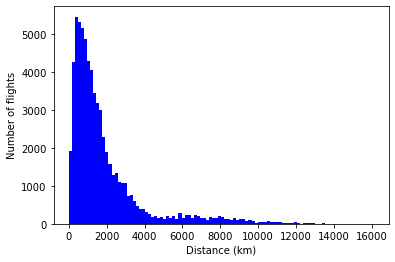

In [41]:
plt.hist(dist_df["Distance"], bins=100, facecolor='b')
plt.xlabel("Distance (km)")
plt.ylabel("Number of flights")
# 그래프로 Distance 확인